In [1]:
import numpy as np
import hydra
from omegaconf import DictConfig
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Exploration des Données (EDA)

### - Importation du dataset et la visualition des premieres lignes

In [13]:
df = pd.read_csv('../data/data.csv')

In [14]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

### - Analyse des types de donnees

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [27]:
df.describe()

price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000  4600.000000   4600.000000   
mean   5.169933e+05     3.392609     2.139158  2114.626739   8934.793261   
std    2.614716e+05     0.856964     0.720548   867.106902   5388.102126   
min    0.000000e+00     1.500000     0.625000   370.000000    638.000000   
25%    3.228750e+05     3.000000     1.750000  1460.000000   5000.750000   
50%    4.609435e+05     3.000000     2.250000  1980.000000   7683.000000   
75%    6.549625e+05     4.000000     2.500000  2620.000000  11001.250000   
max    1.153094e+06     5.500000     3.625000  4360.000000  20002.000000   

            floors  waterfront    view    condition   sqft_above  \
count  4600.000000      4600.0  4600.0  4600.000000  4600.000000   
mean      1.512065         0.0     0.0     3.452391  1810.417826   
std       0.538288         0.0     0.0     0.675105   800.648273   
min       1.000000         0.0     0.0     1.500000   370.000000   
25%       1.000000         0.0     0.0     3.000000  1190.000000   
50%       1.500000         0.0     0.0     3.000000  1590.000000   
75%       2.000000         0.0     0.0     4.000000  2300.000000   
max       3.500000         0.0     0.0     5.000000  3965.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      305.431522  1970.786304    808.608261  
std       438.534107    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      1525.000000  2014.000000   2014.000000

In [29]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [28]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

### Detection des valeurs manquantes

In [16]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## les valeurs aberrantes

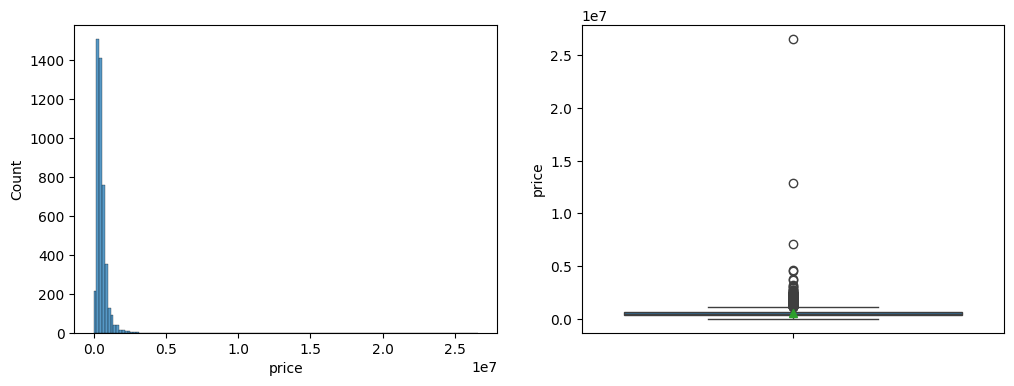

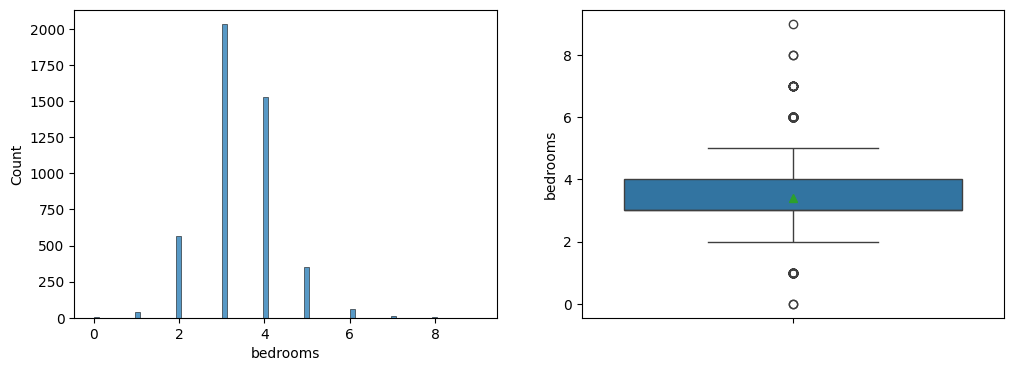

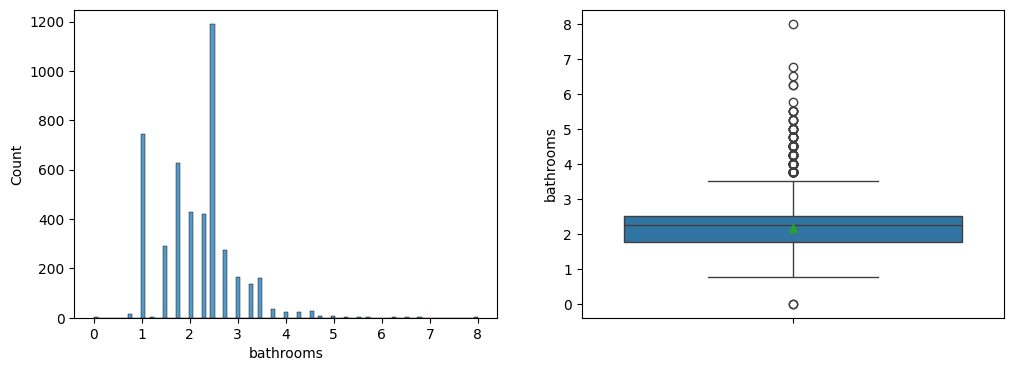

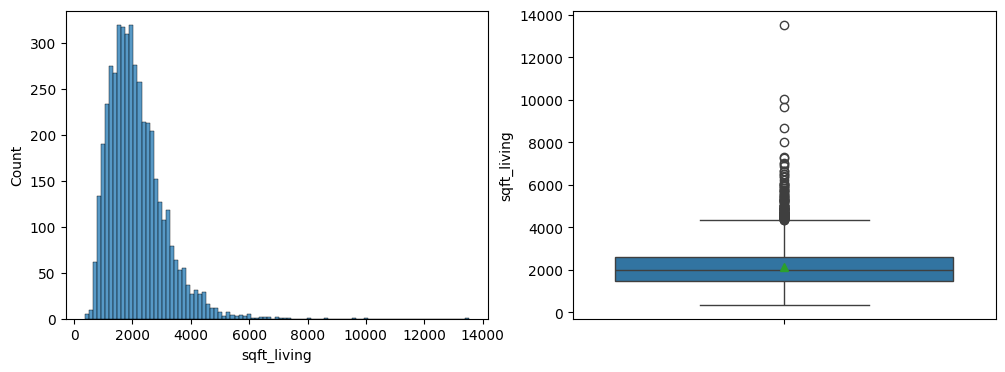

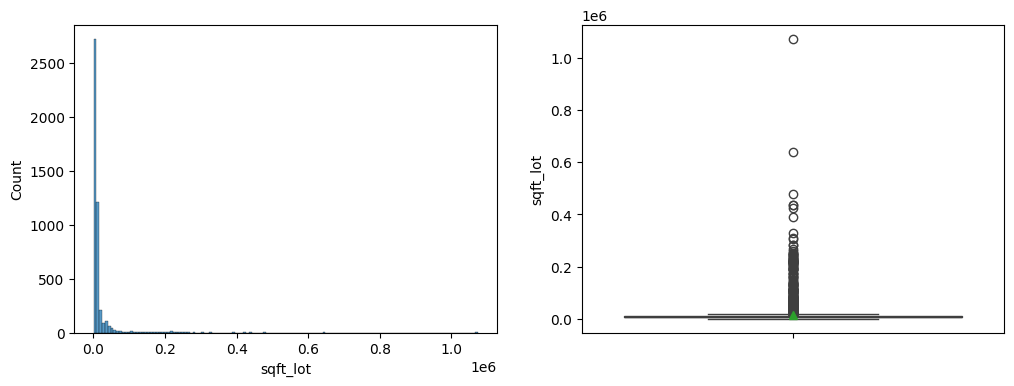

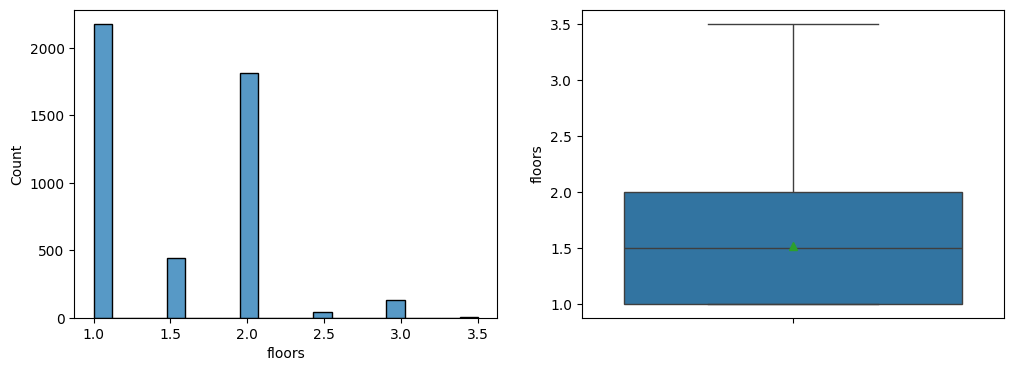

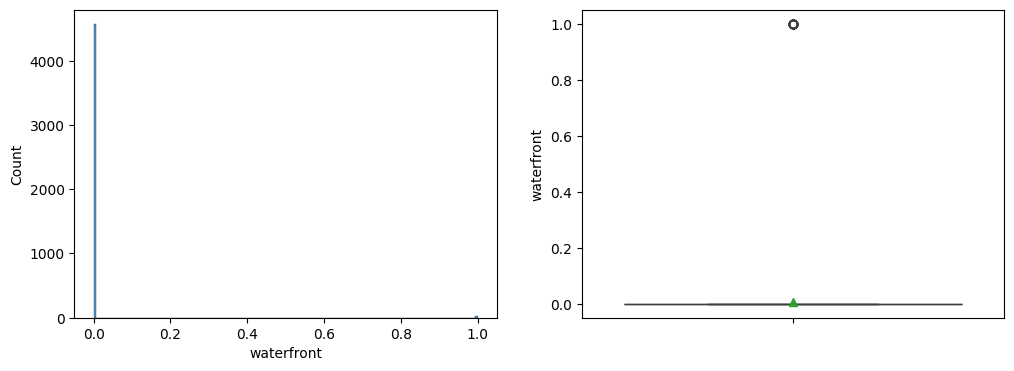

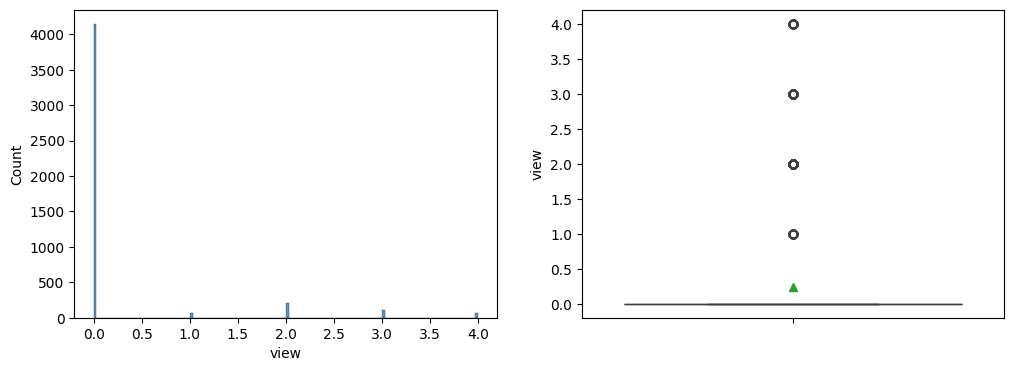

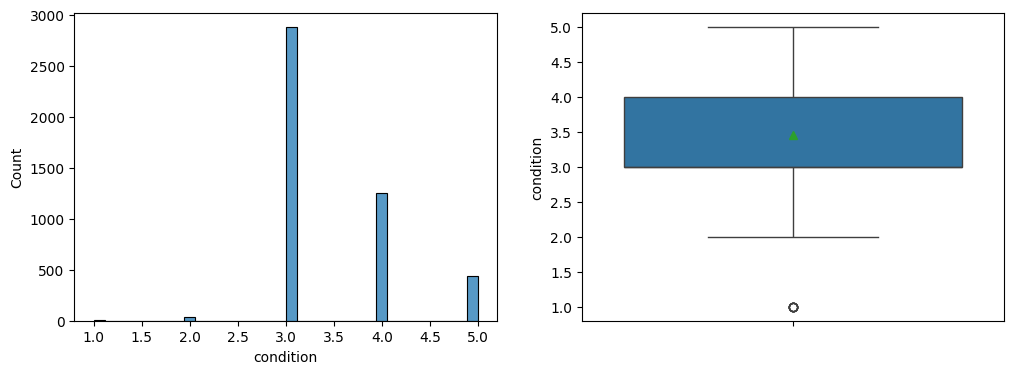

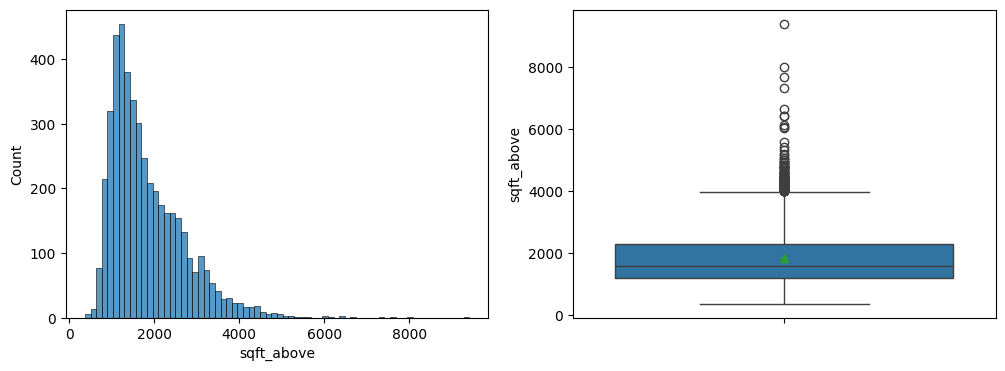

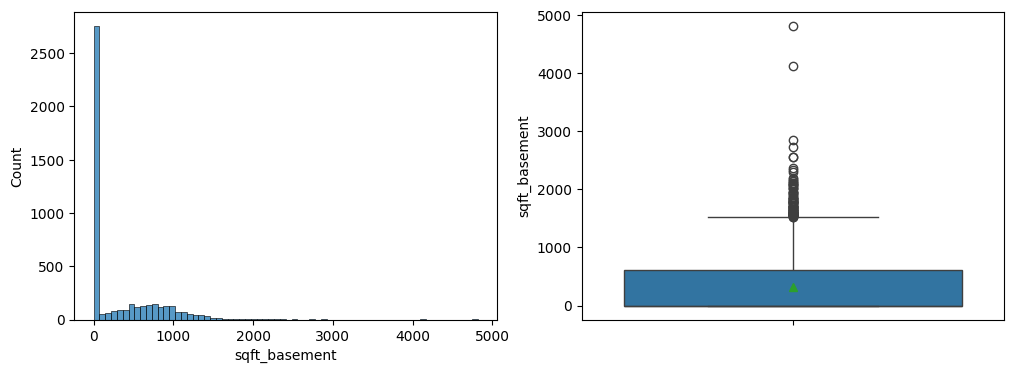

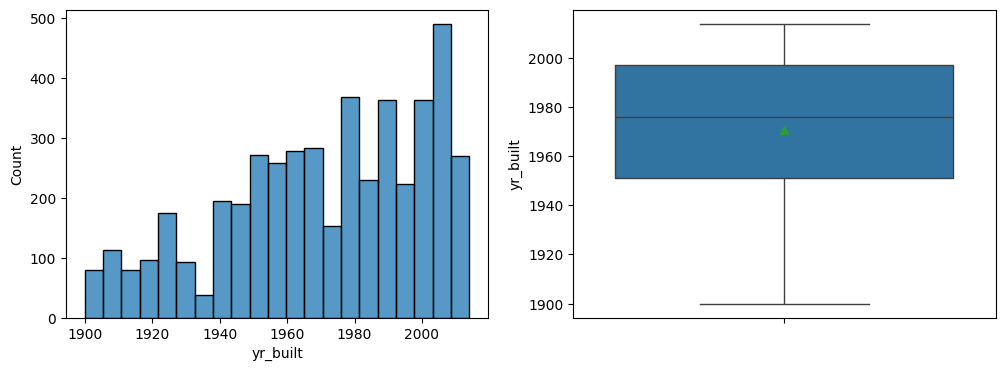

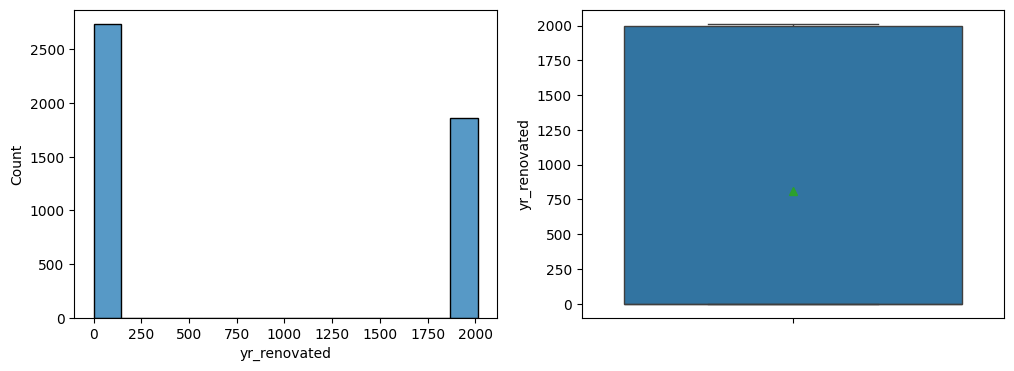

In [17]:
for col in df.select_dtypes('number').columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    sns.histplot(df[col], ax = axes[0])
    sns.boxplot(df[col], ax = axes[1], showmeans=True)
plt.show() 

### Identificatoins des correlations 

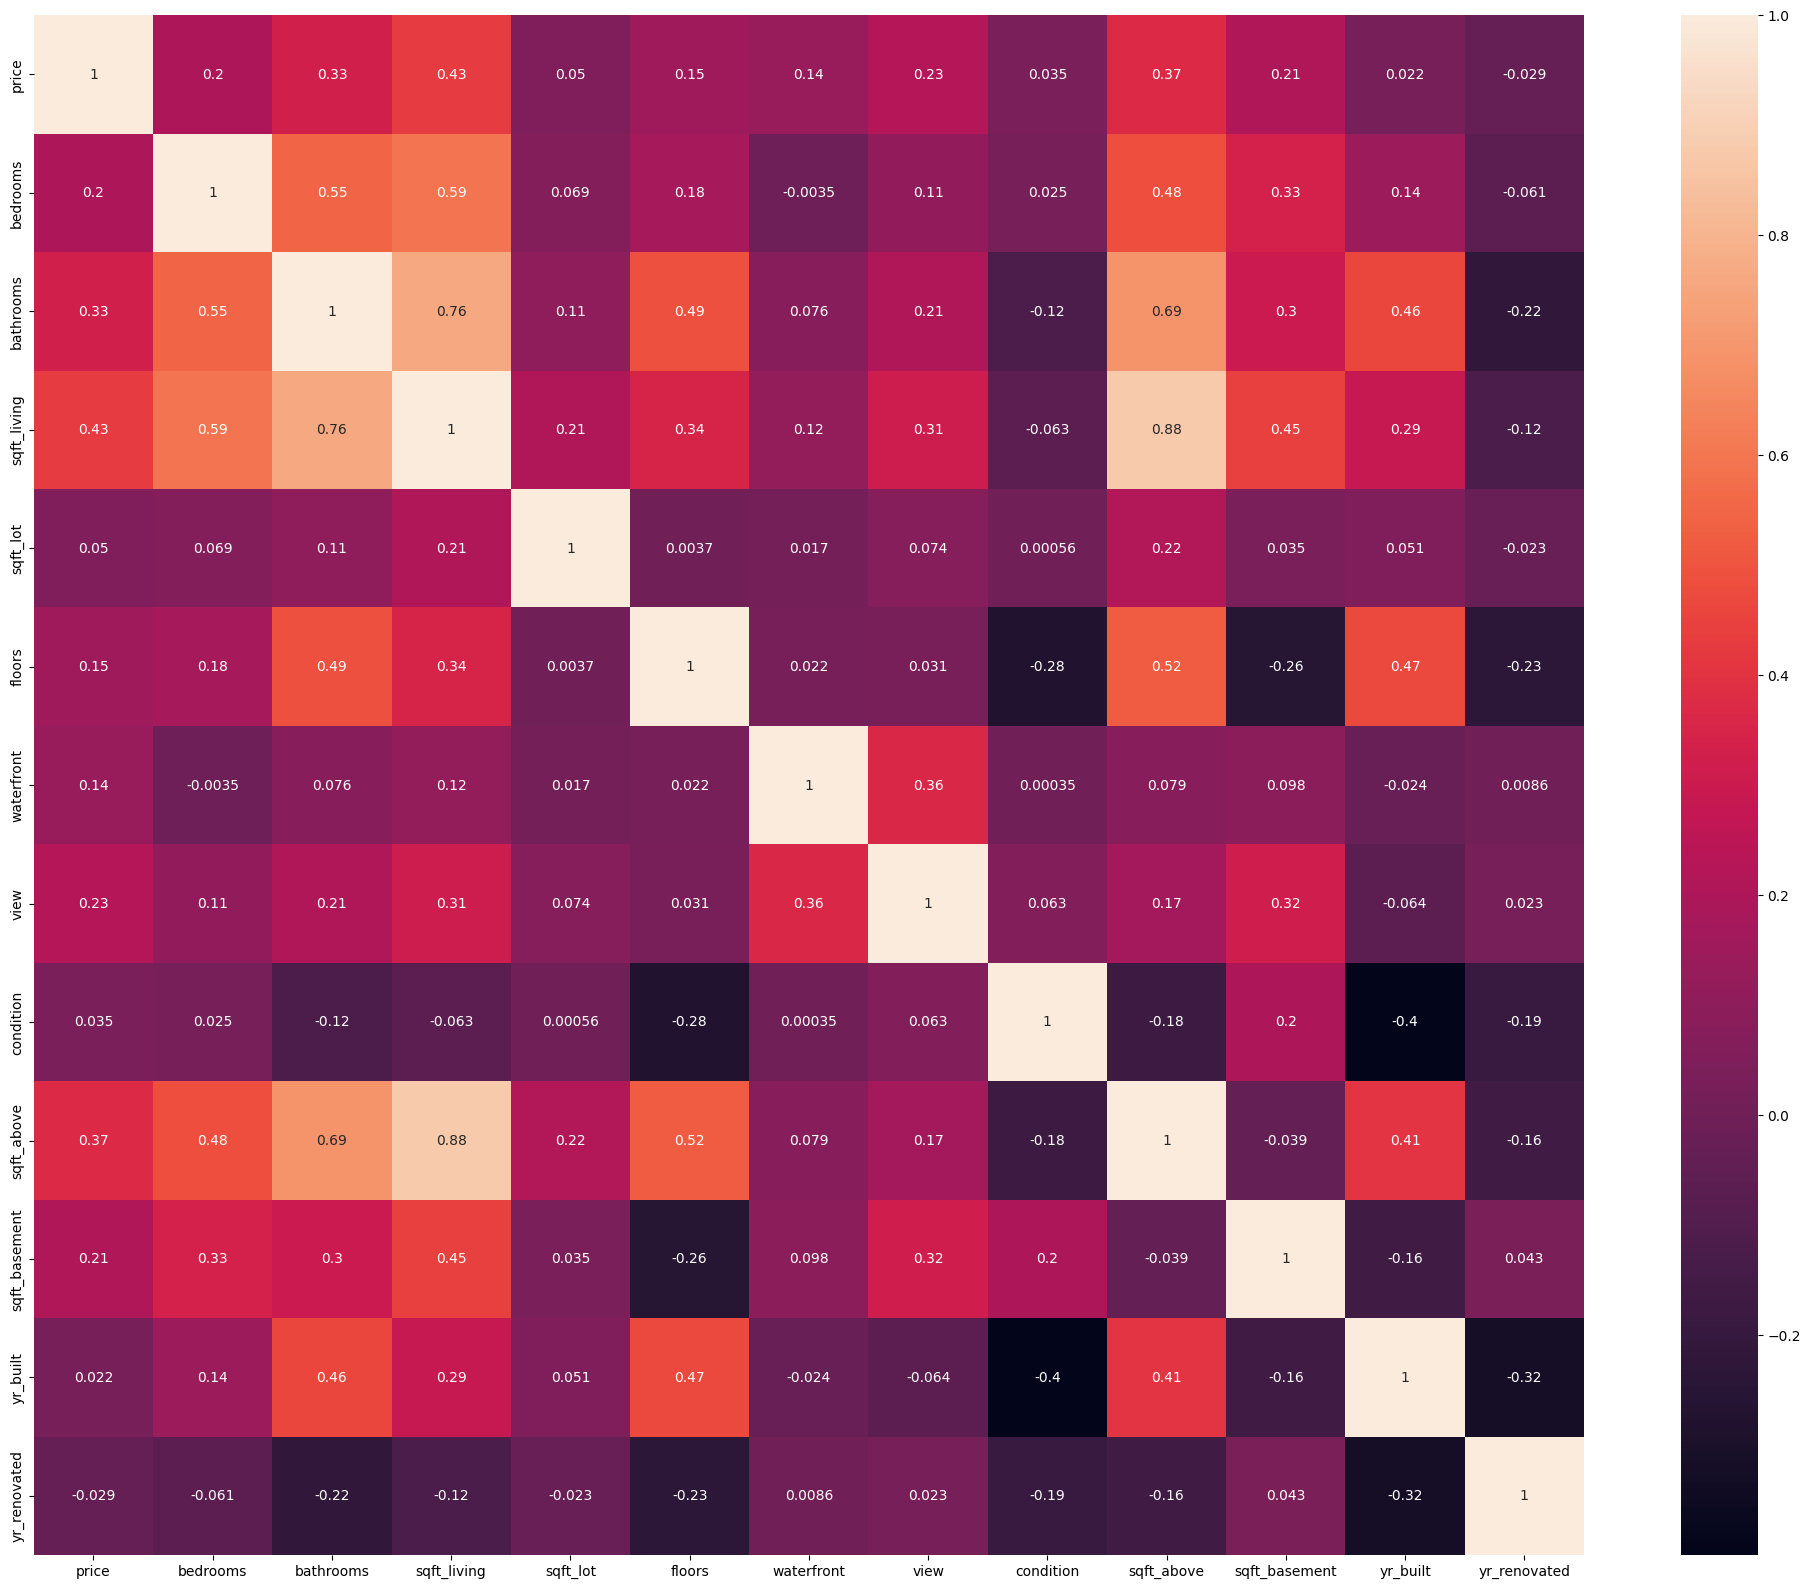

In [18]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

###  Visualiser la distribution des données pour les différentes classes(par exemple, satisfaction/non satisfaction)

<Axes: xlabel='price', ylabel='Count'>

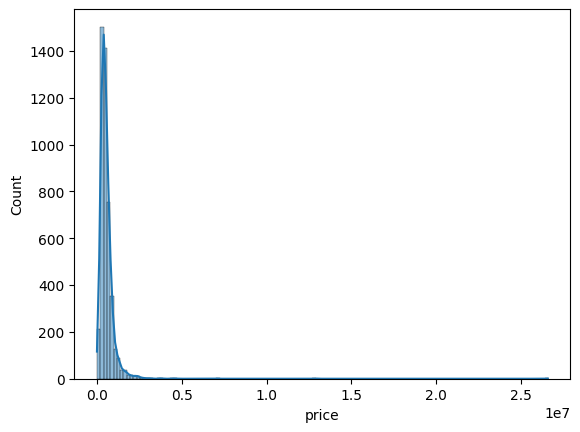

In [22]:
sns.histplot(df['price'], kde=True)

### 2. Prétraitement des Données

Dans ce cas de preprocessing, nous allons utiliser les pipelines, mais avant cela traitons d'abord les valeurs aberrantes

In [24]:
def impute_outliers(data, colname): 
    q1 = np.percentile(data[colname], 25)
    q3 = np.percentile(data[colname], 75) 

    lower_bound = q1 - 1.5*(q3 - q1)
    upper_bound = q3 + 1.5*(q3 - q1)

    data.loc[(data[colname] <= lower_bound), colname] = lower_bound
    data.loc[(data[colname] >= upper_bound), colname] = upper_bound

In [25]:
for colname in df.select_dtypes('number').columns:
    impute_outliers(df, colname)

C:\Users\ariel\AppData\Local\Temp\ipykernel_5300\843233136.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[colname] <= lower_bound), colname] = lower_bound
C:\Users\ariel\AppData\Local\Temp\ipykernel_5300\843233136.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2998.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[colname] <= lower_bound), colname] = lower_bound


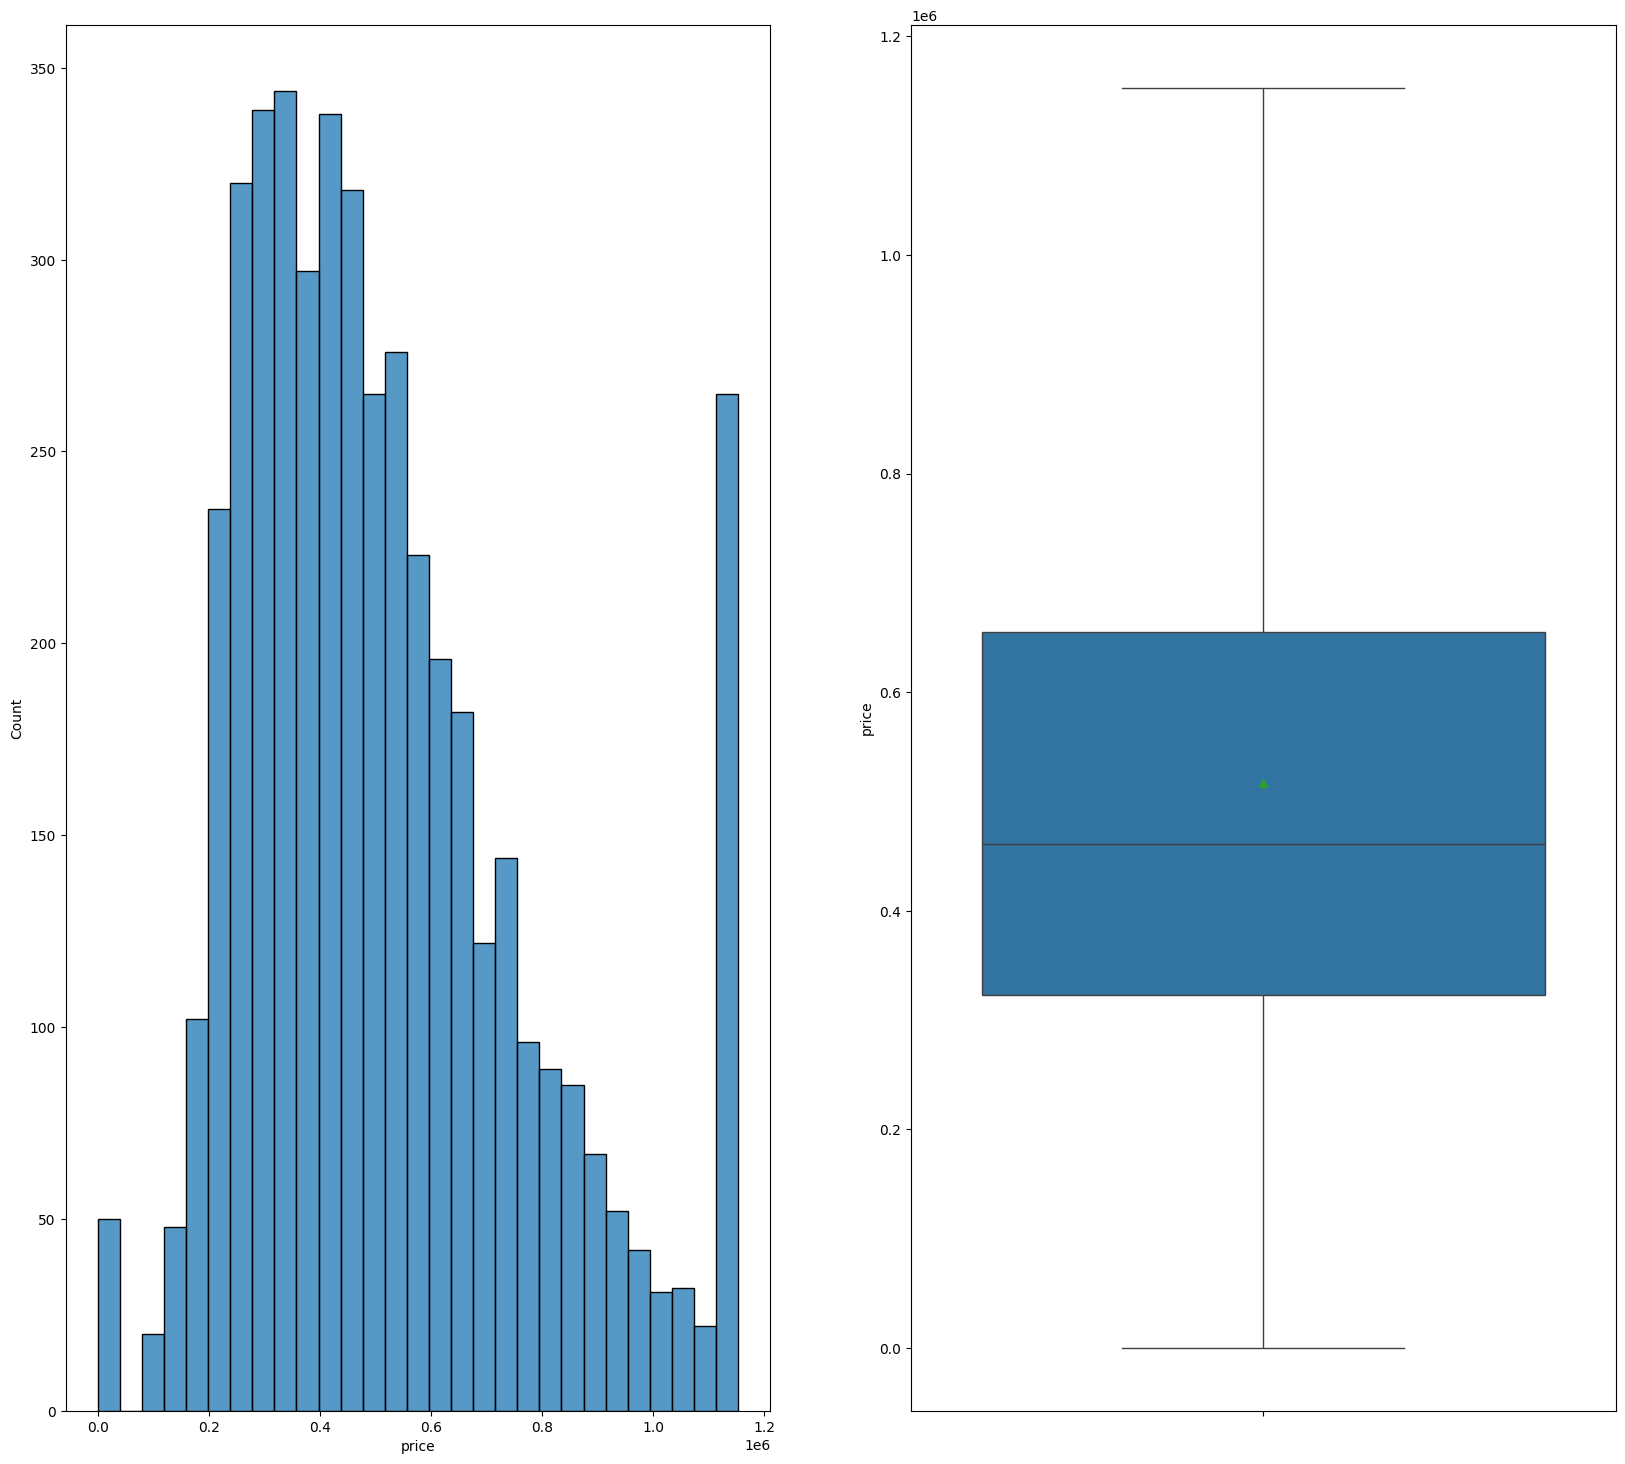

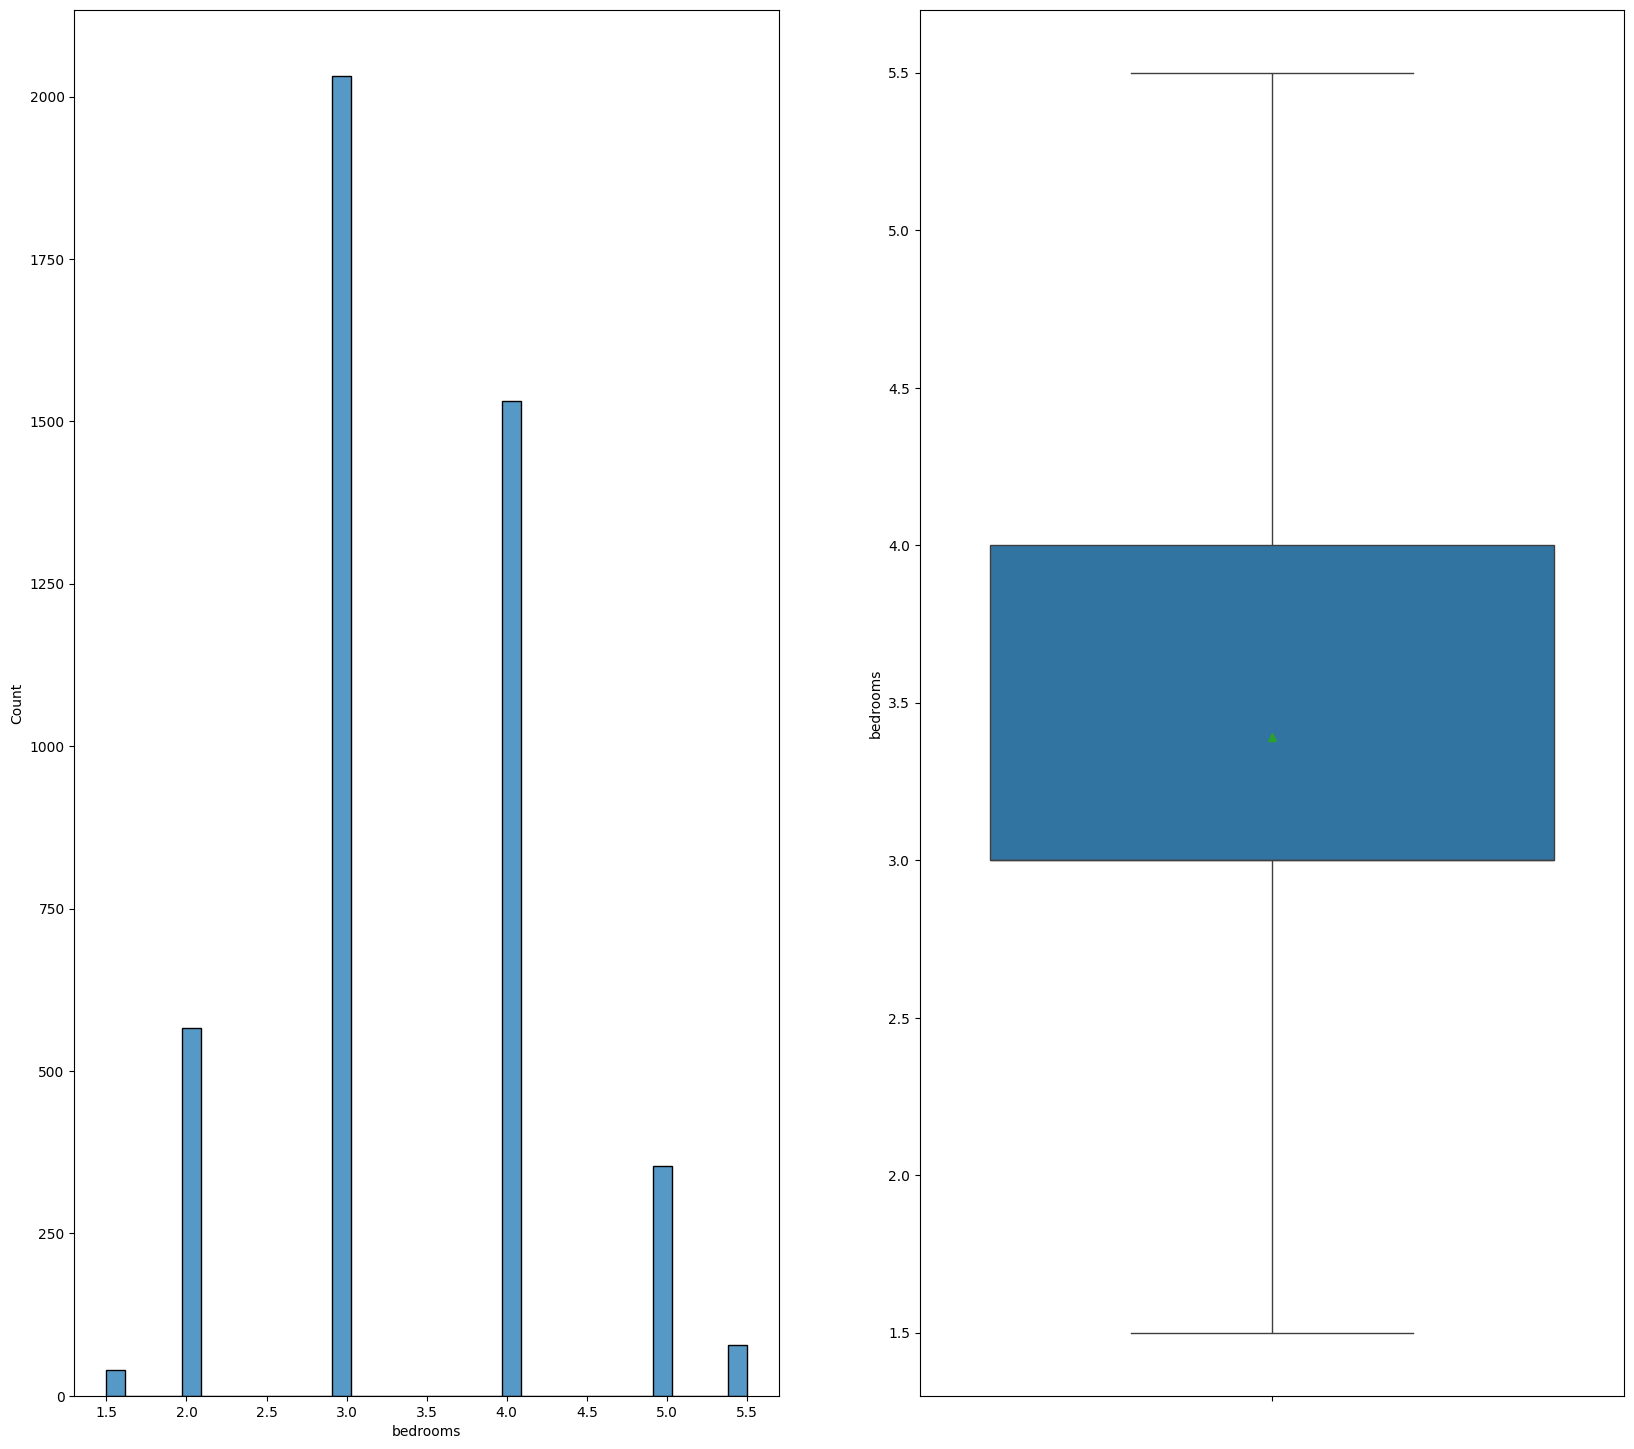

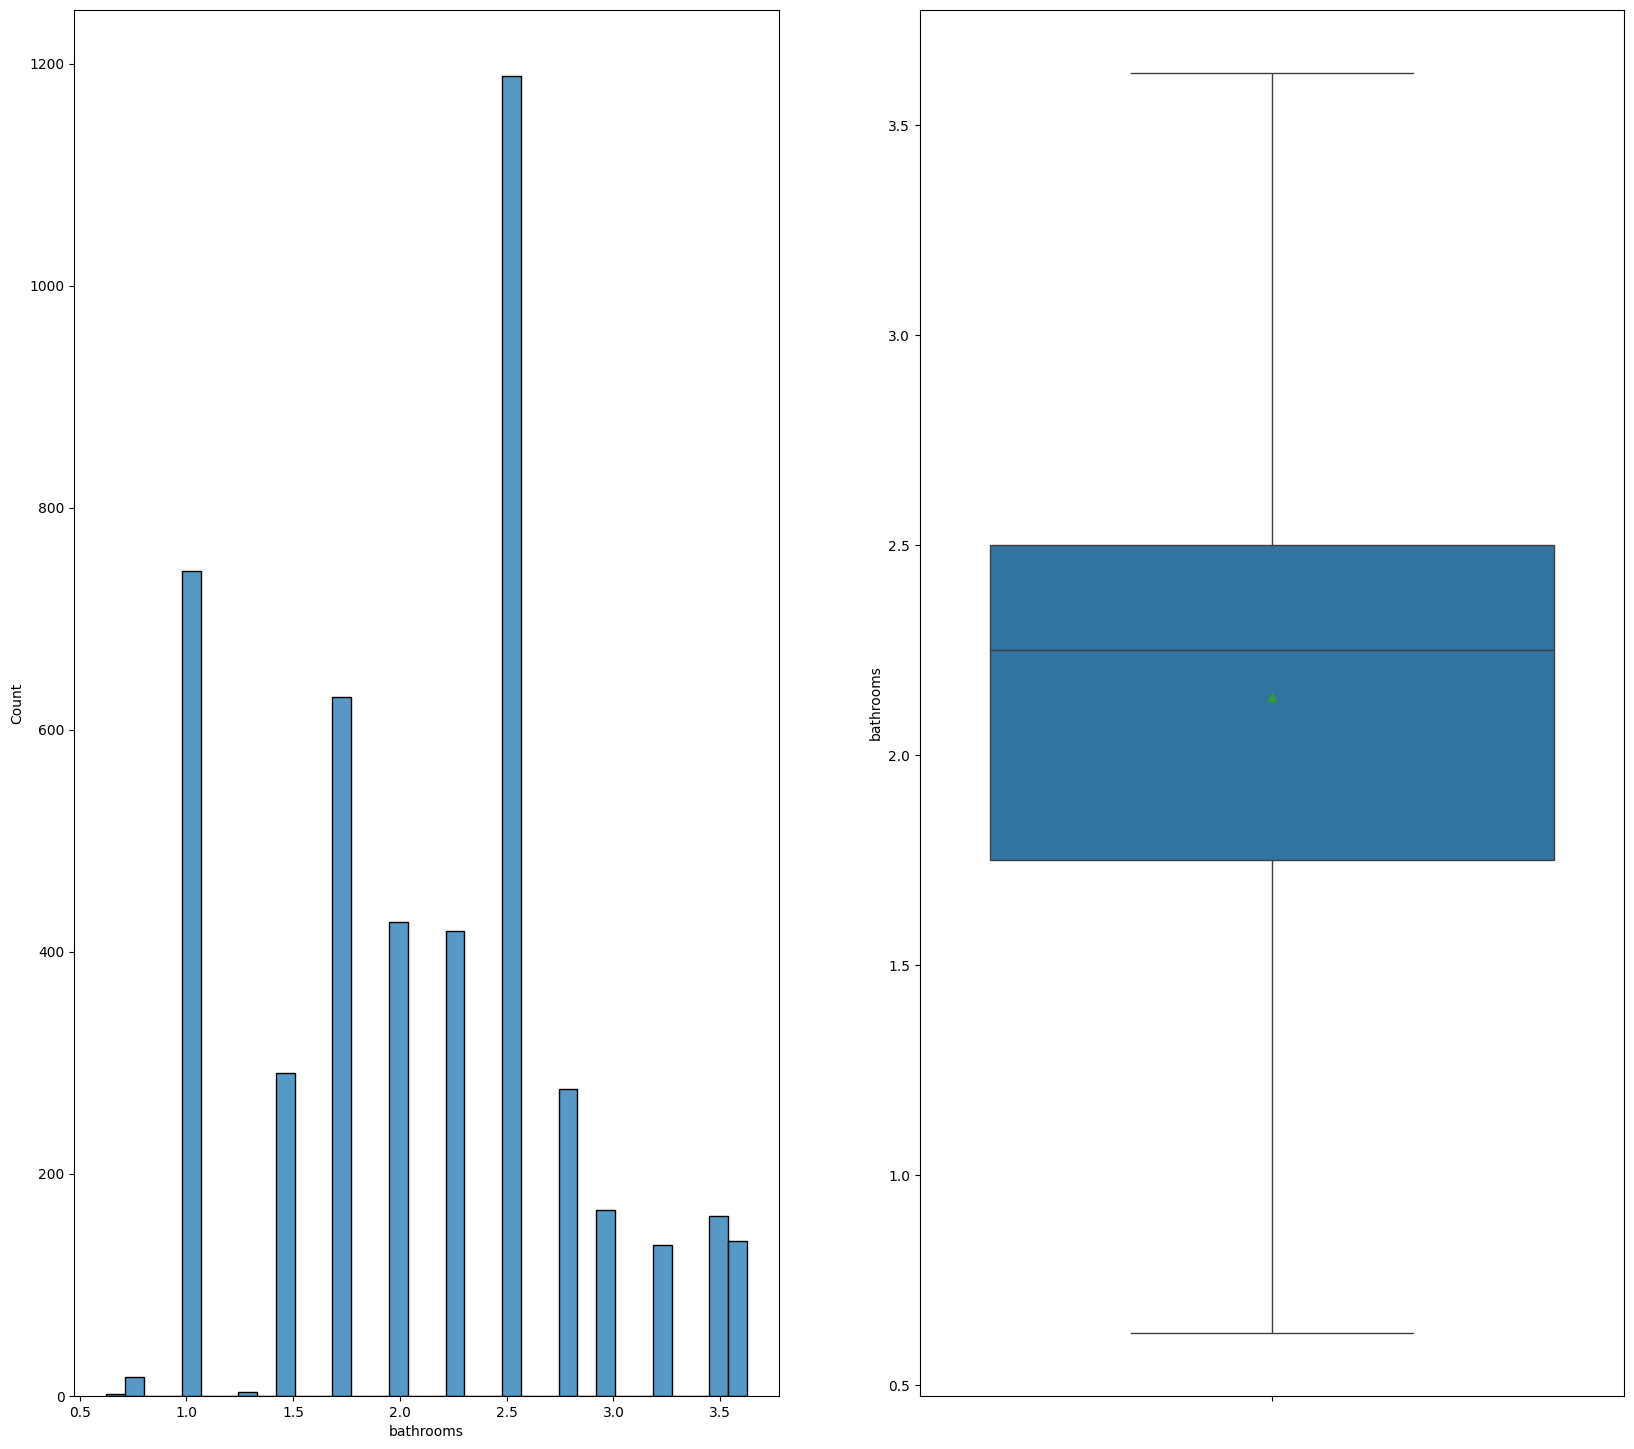

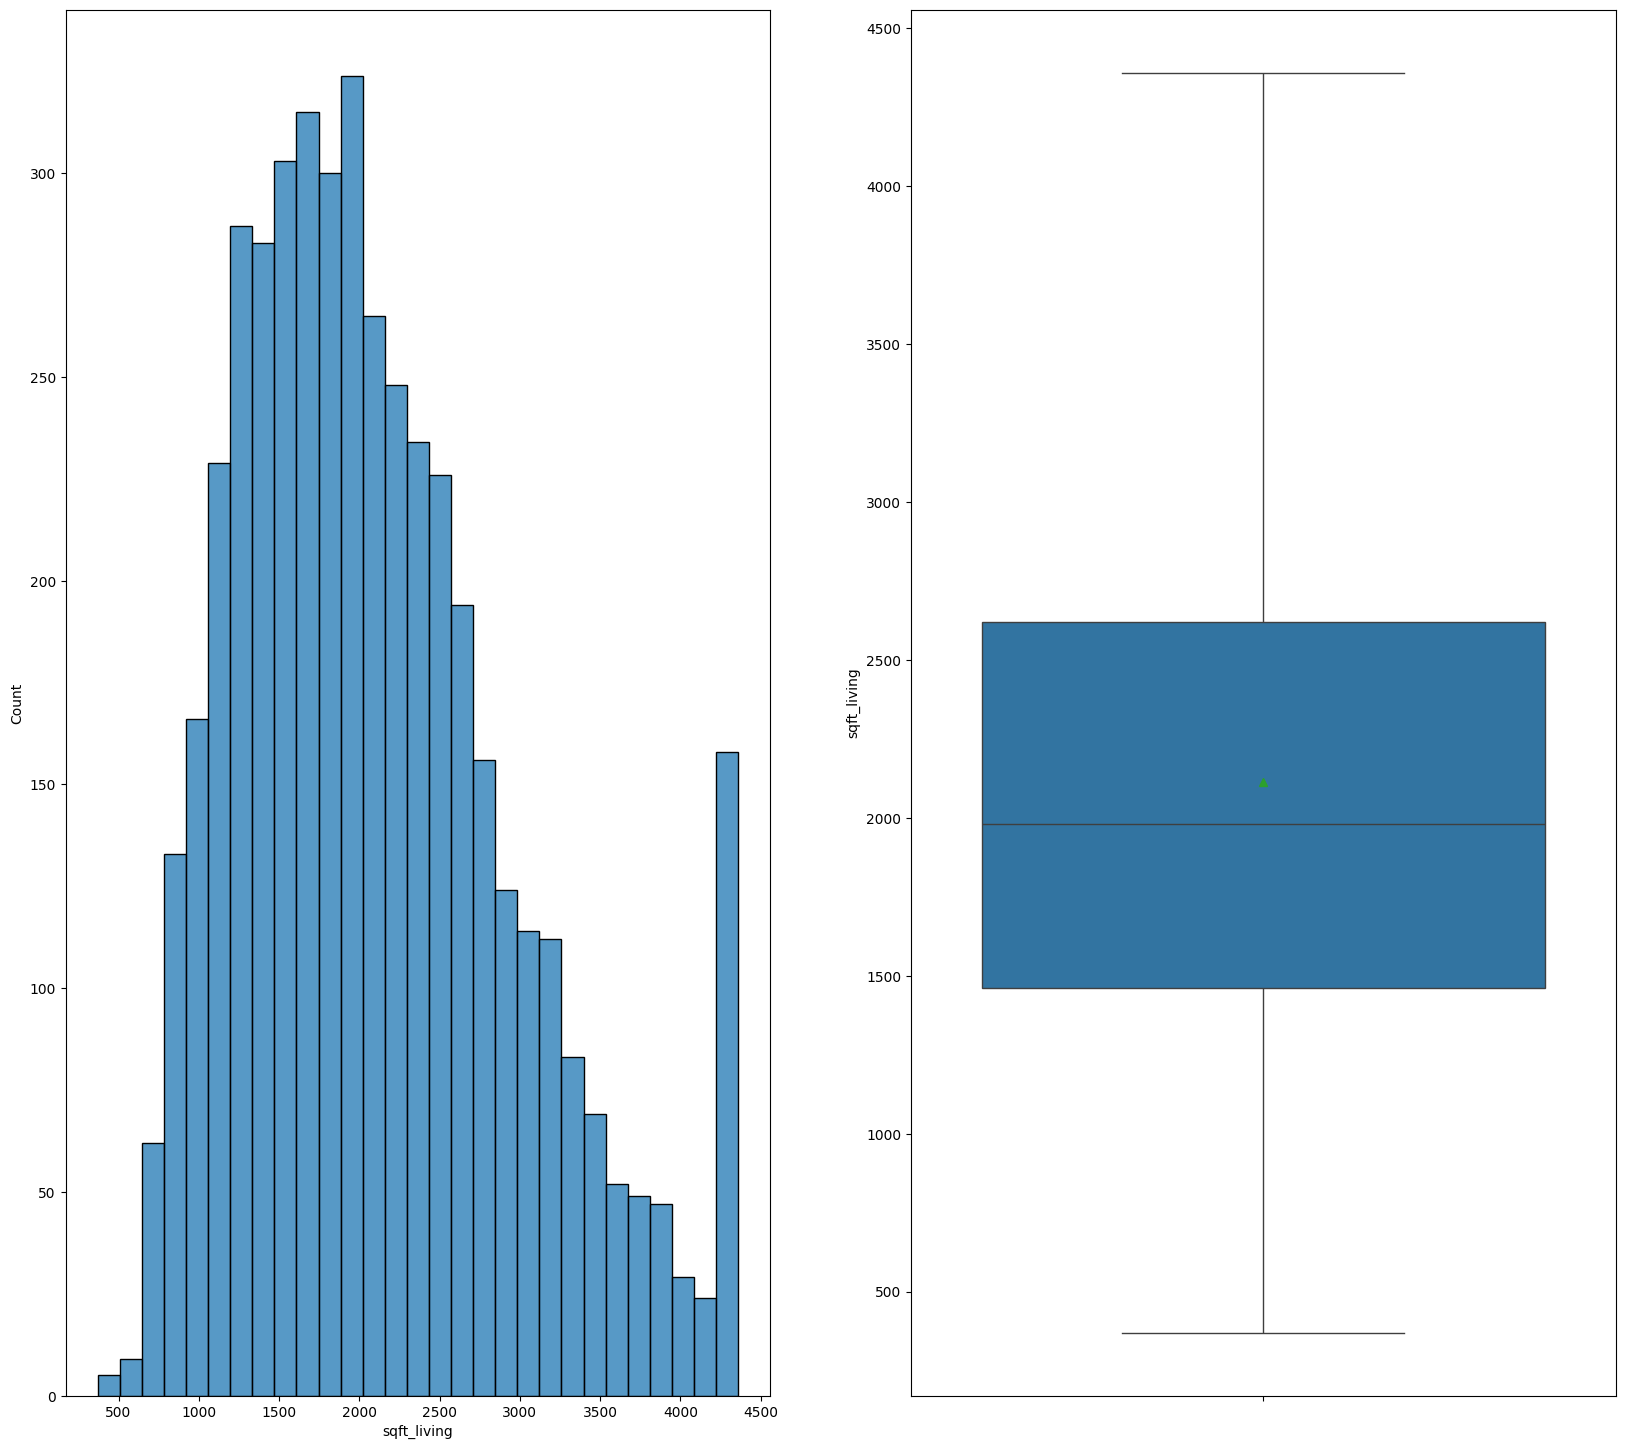

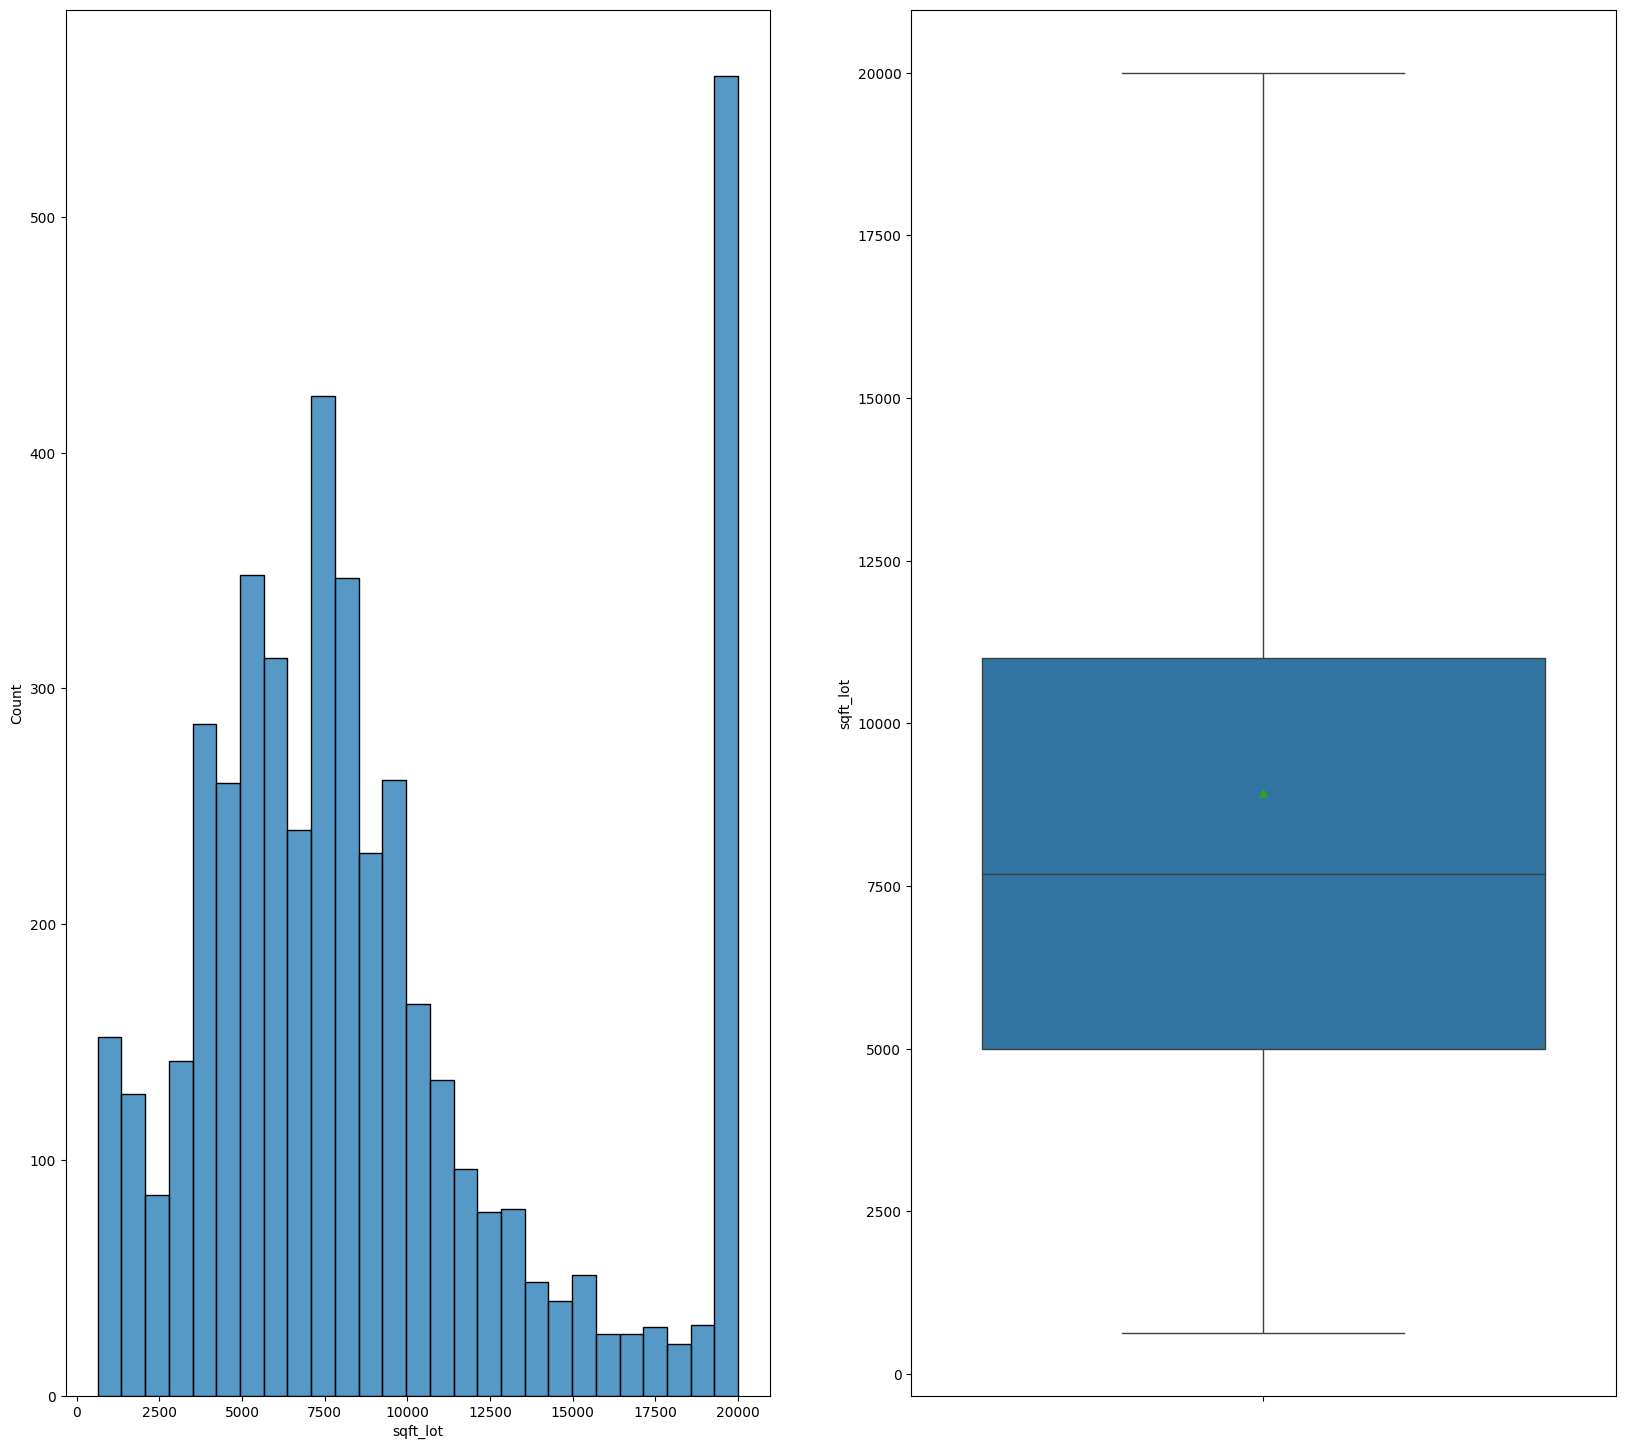

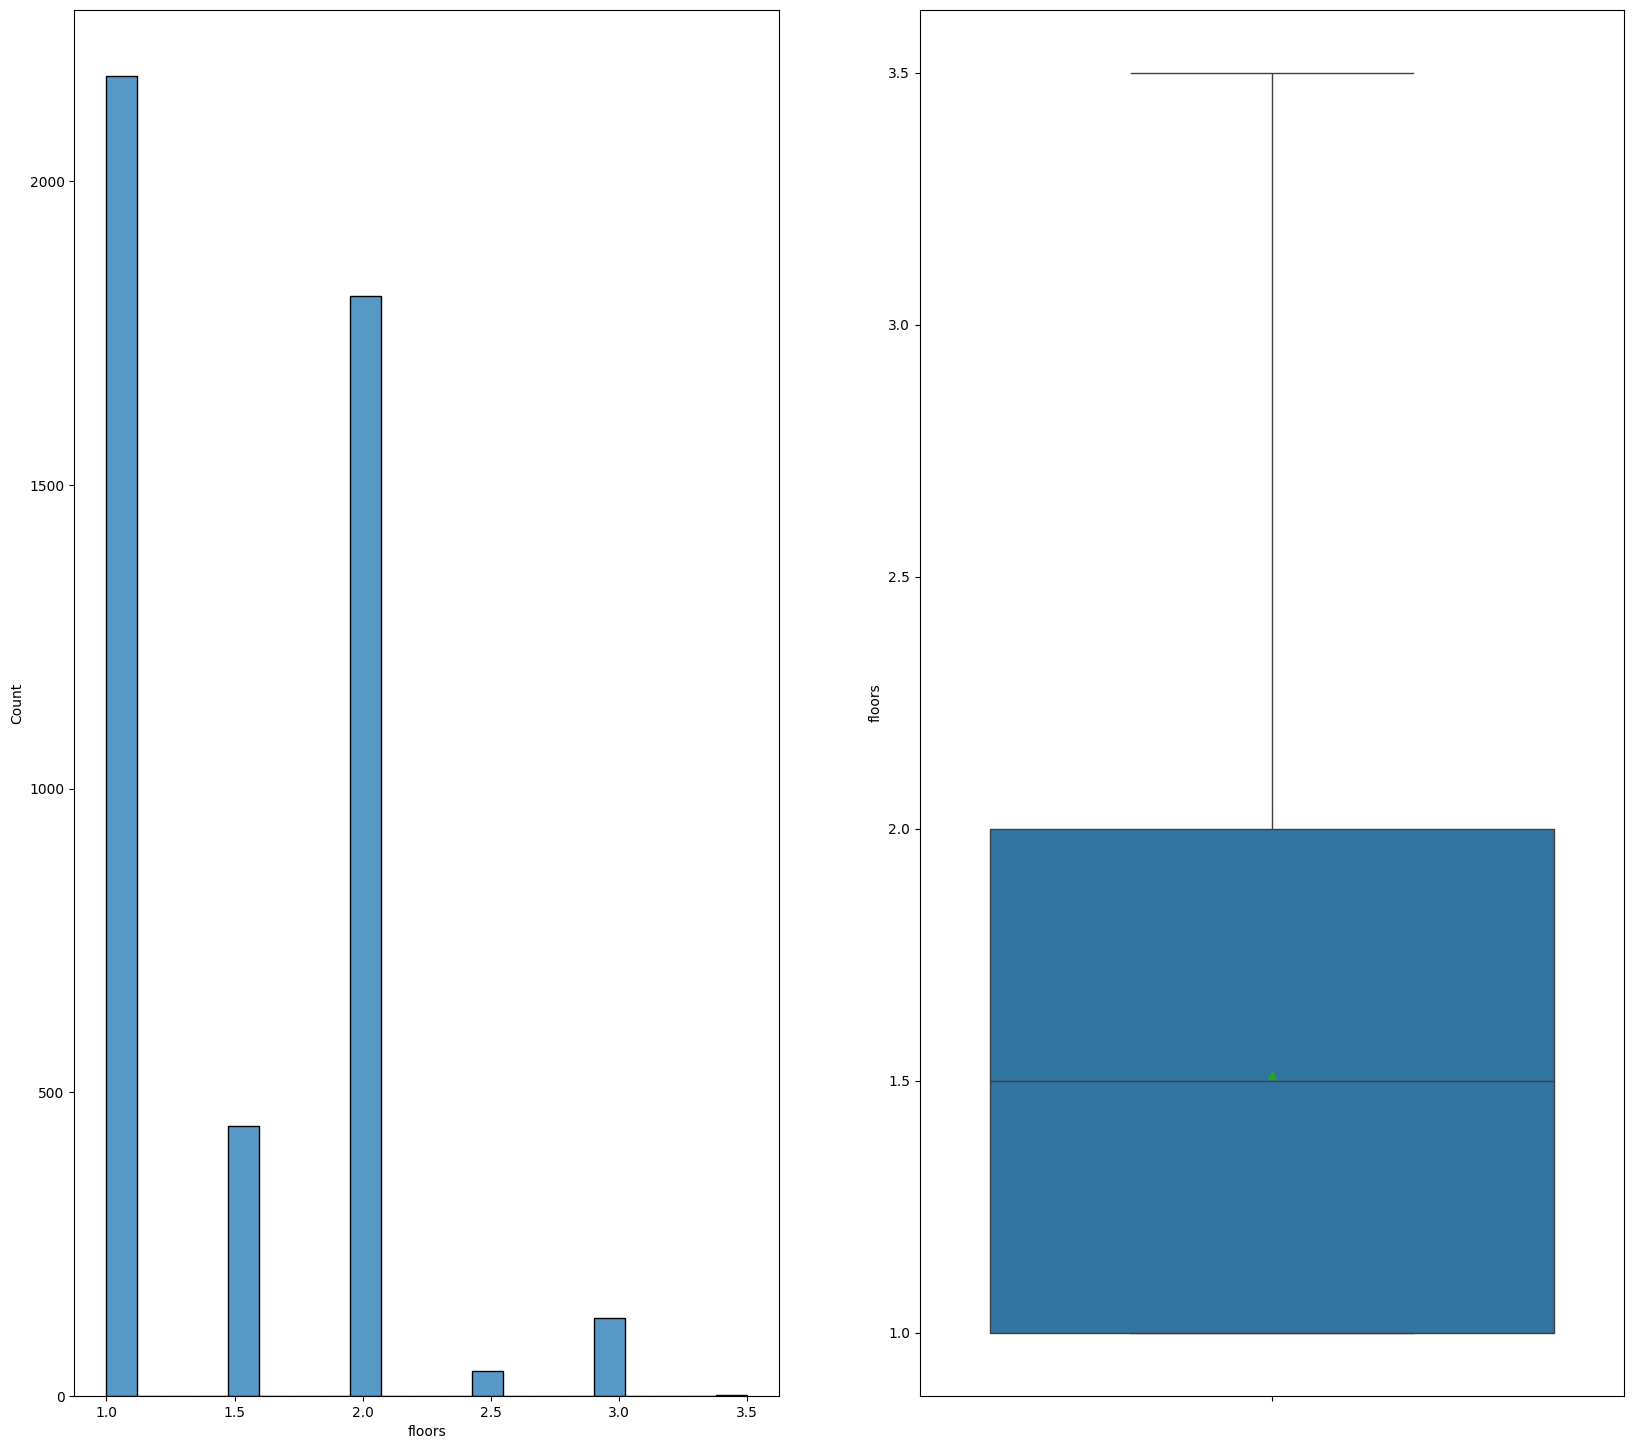

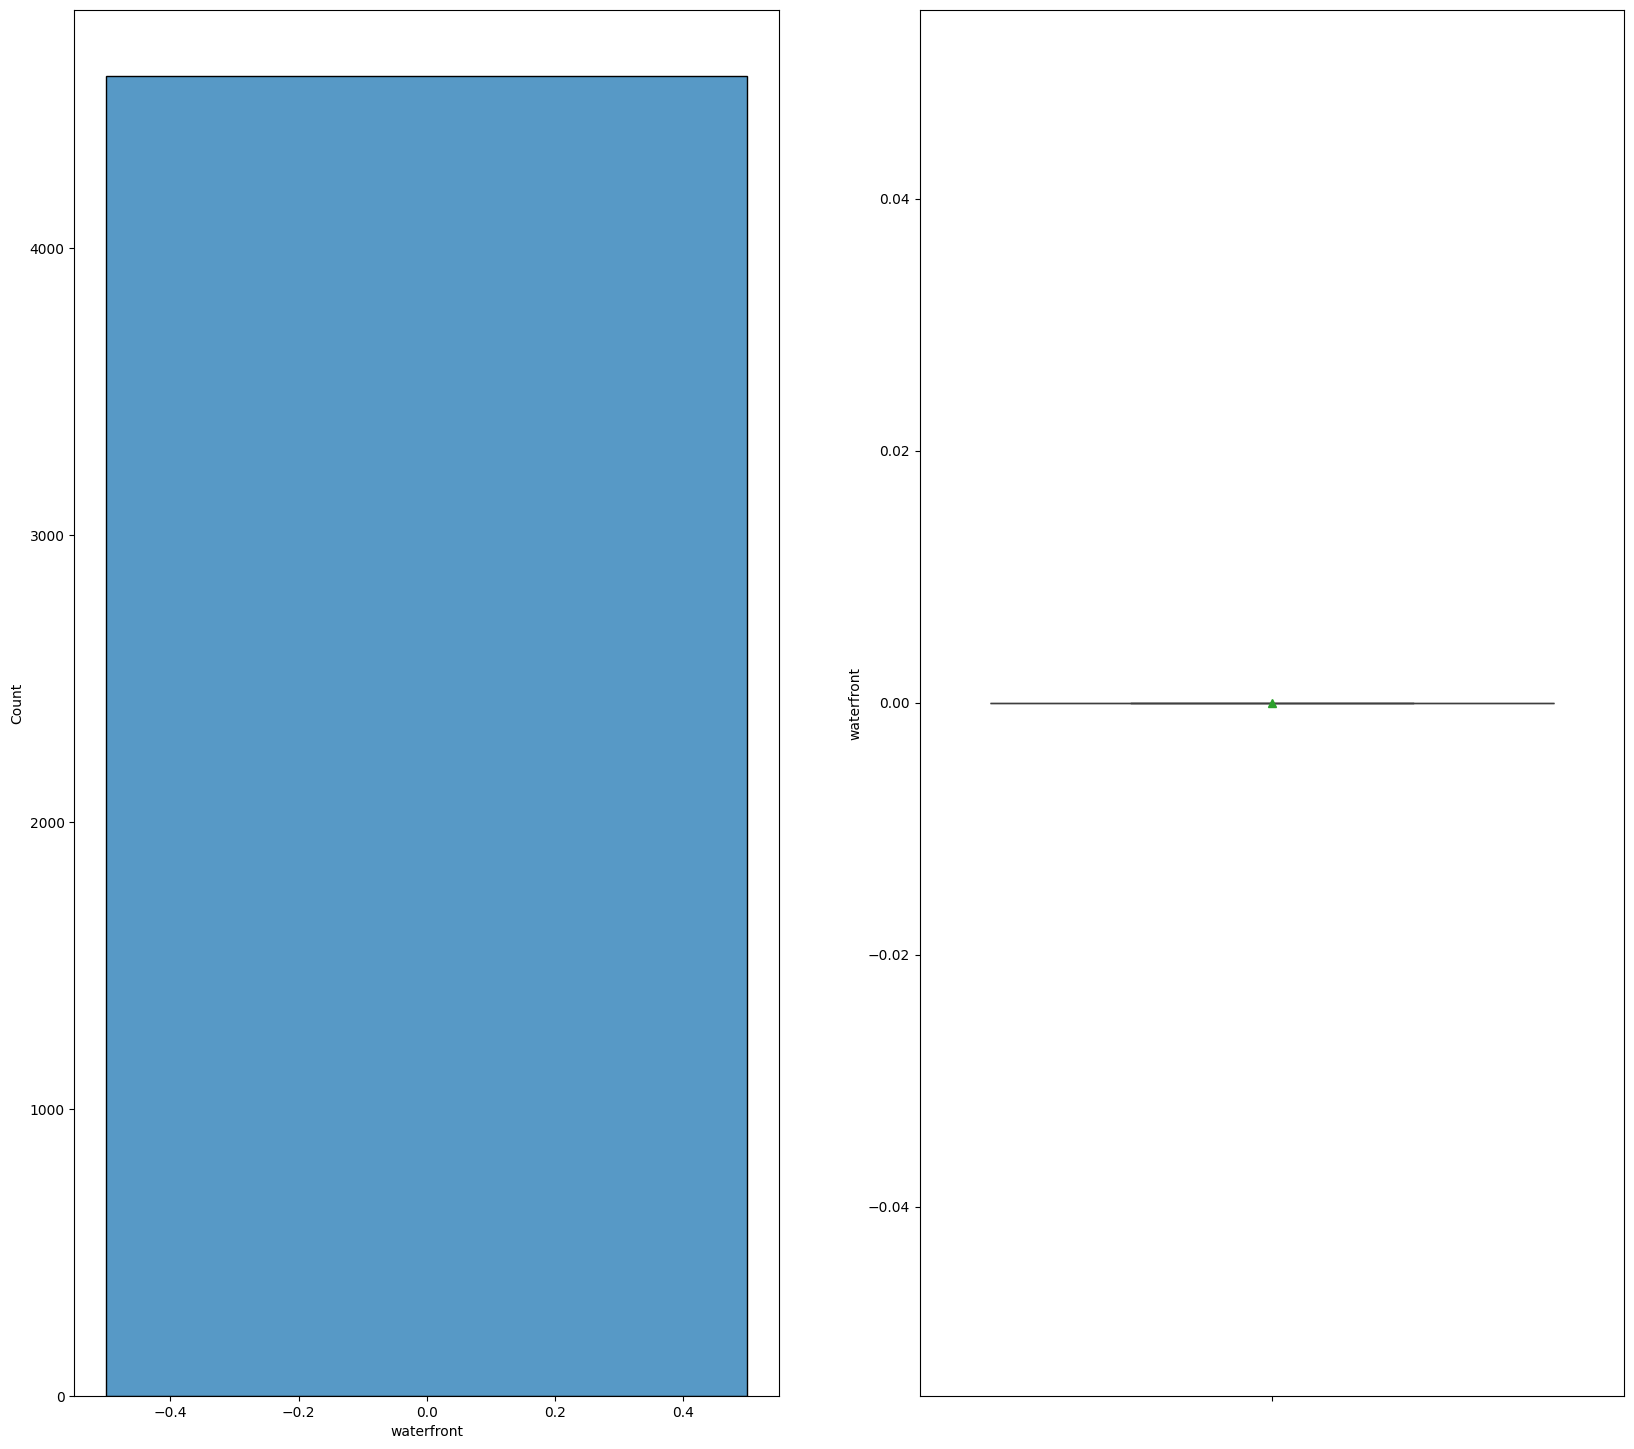

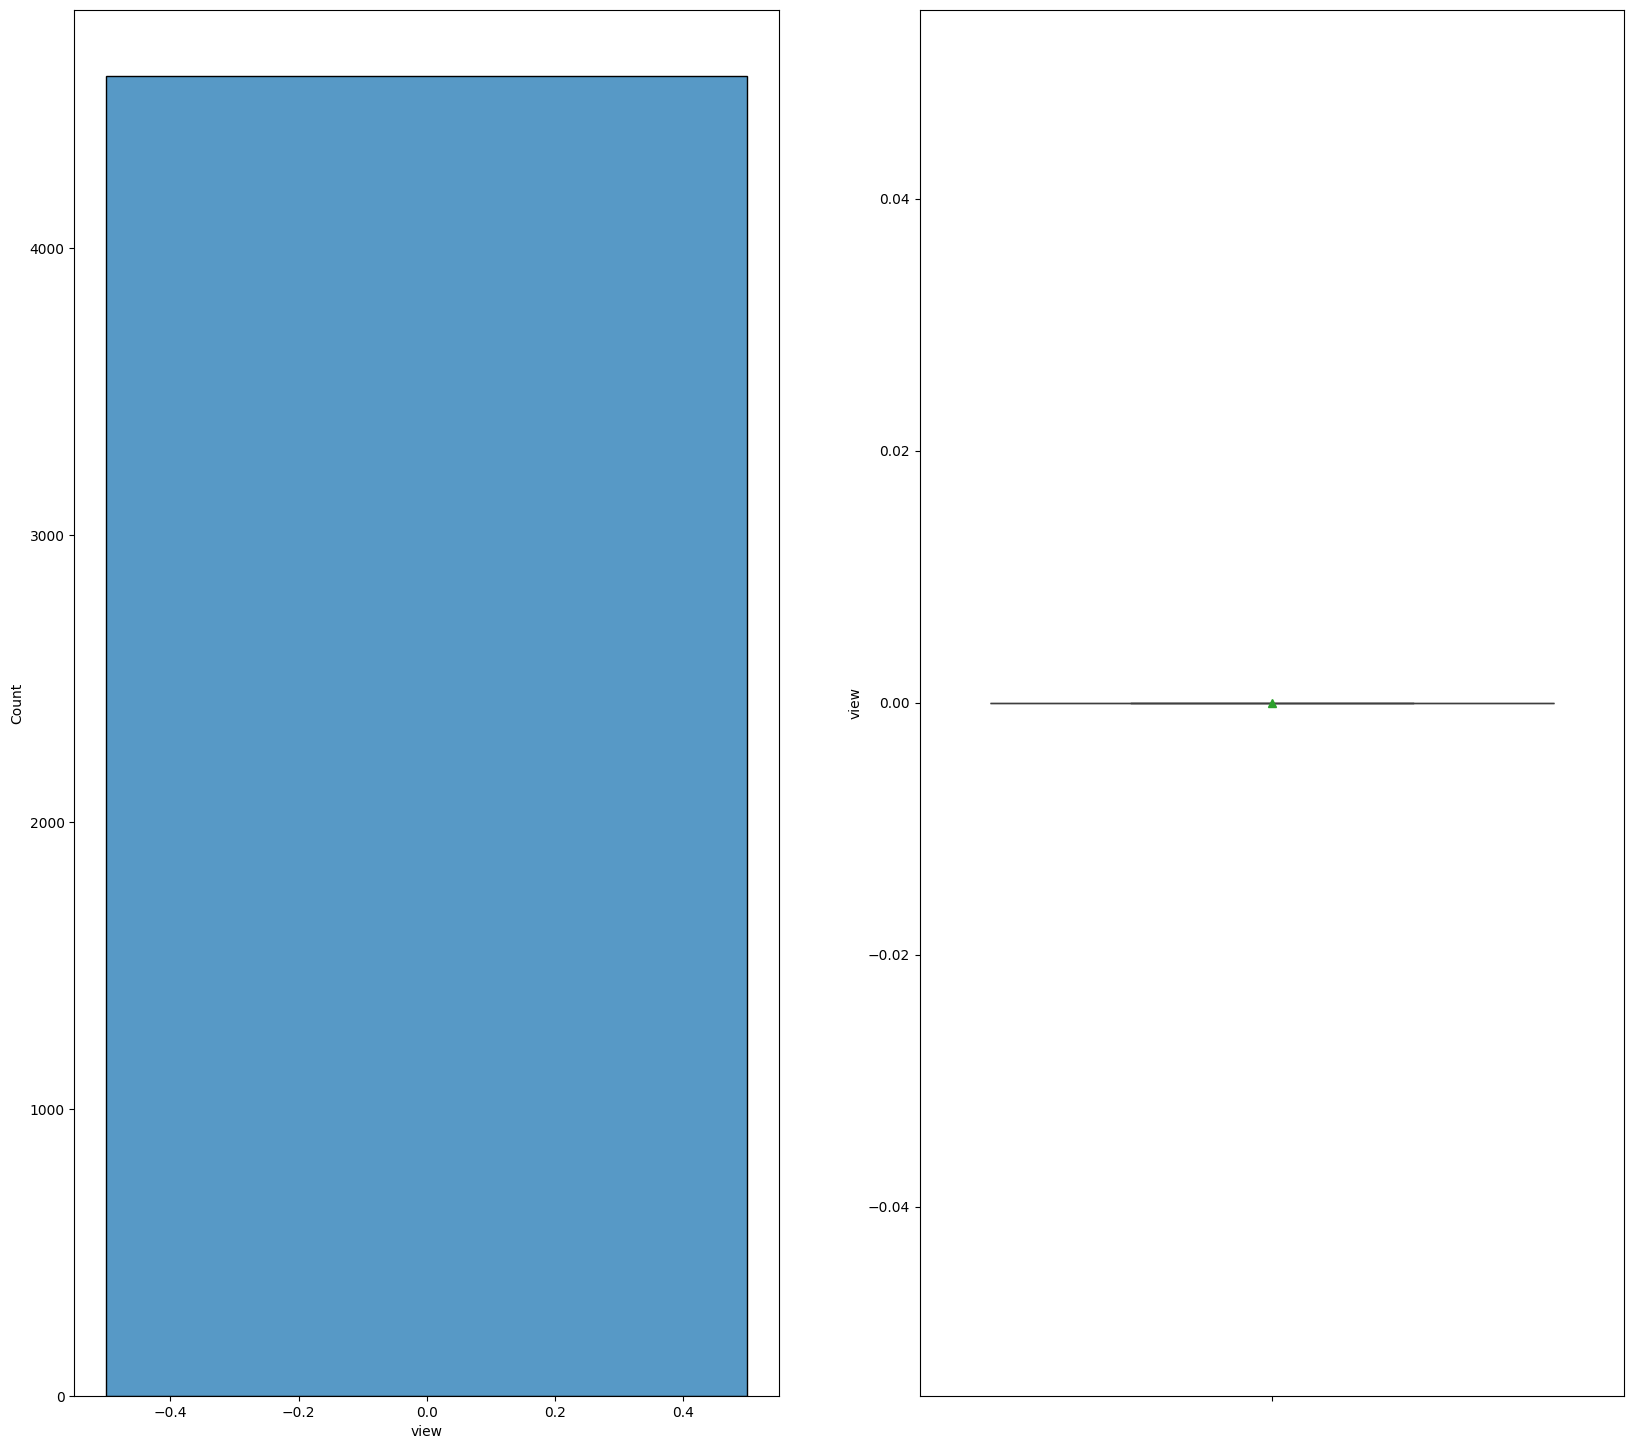

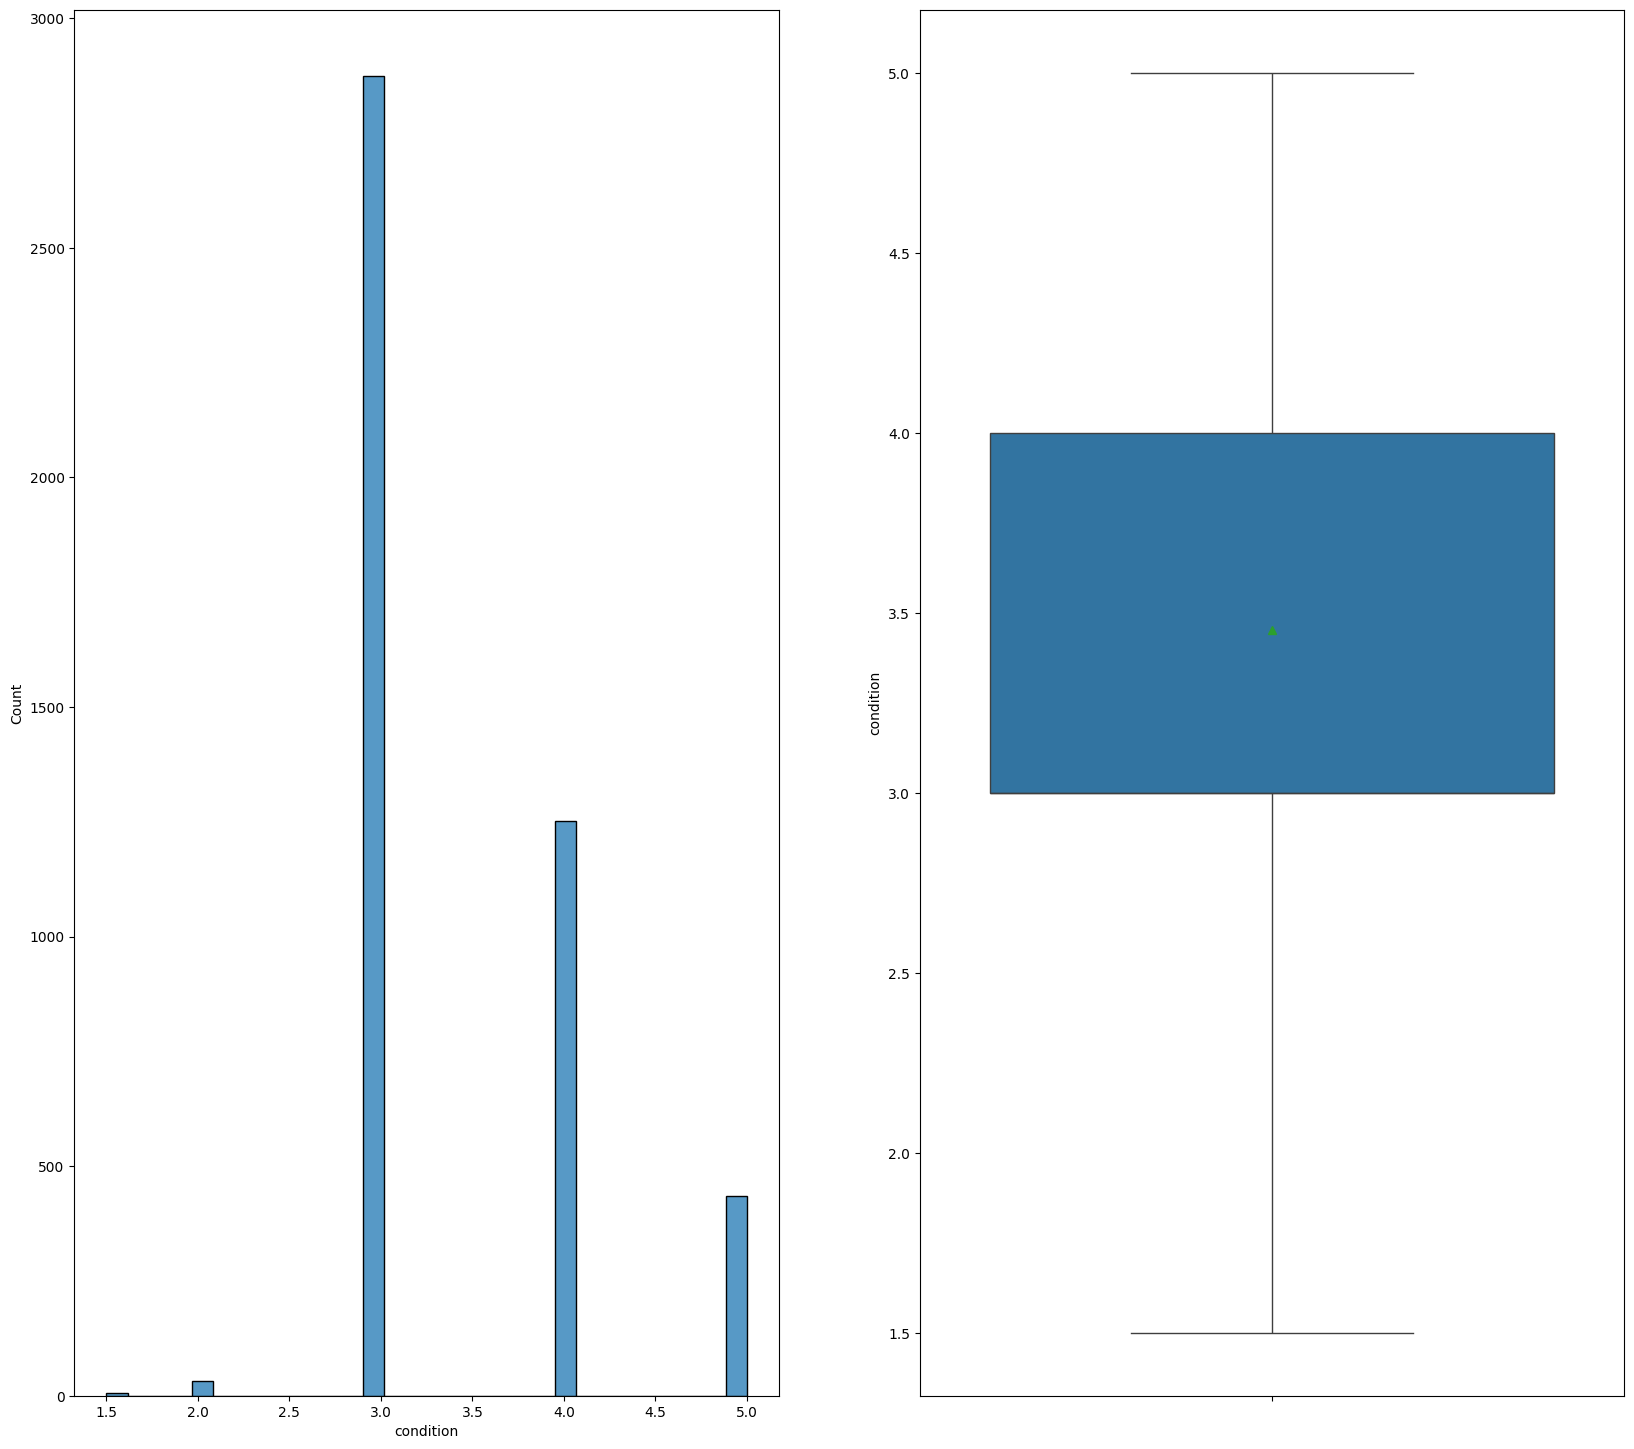

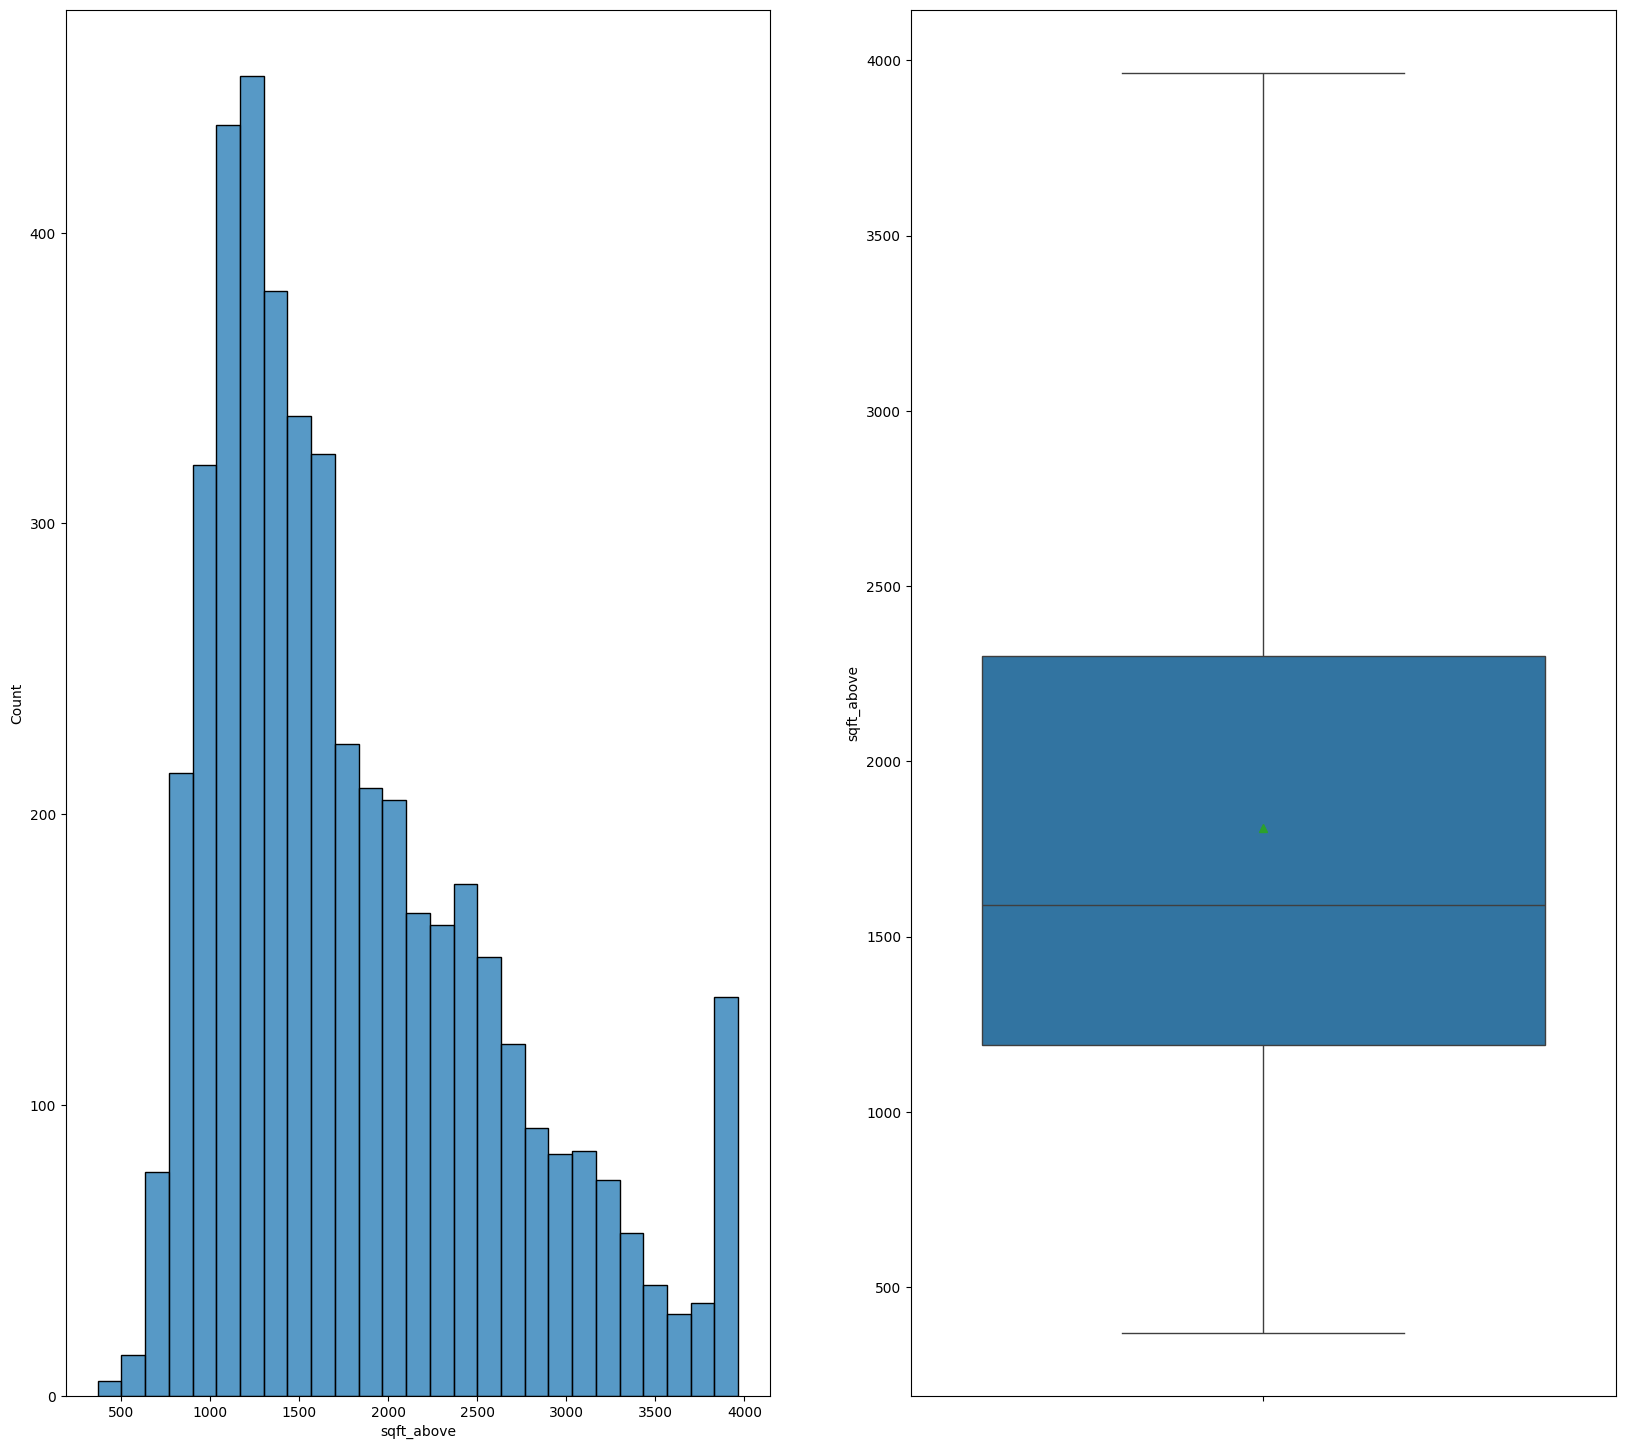

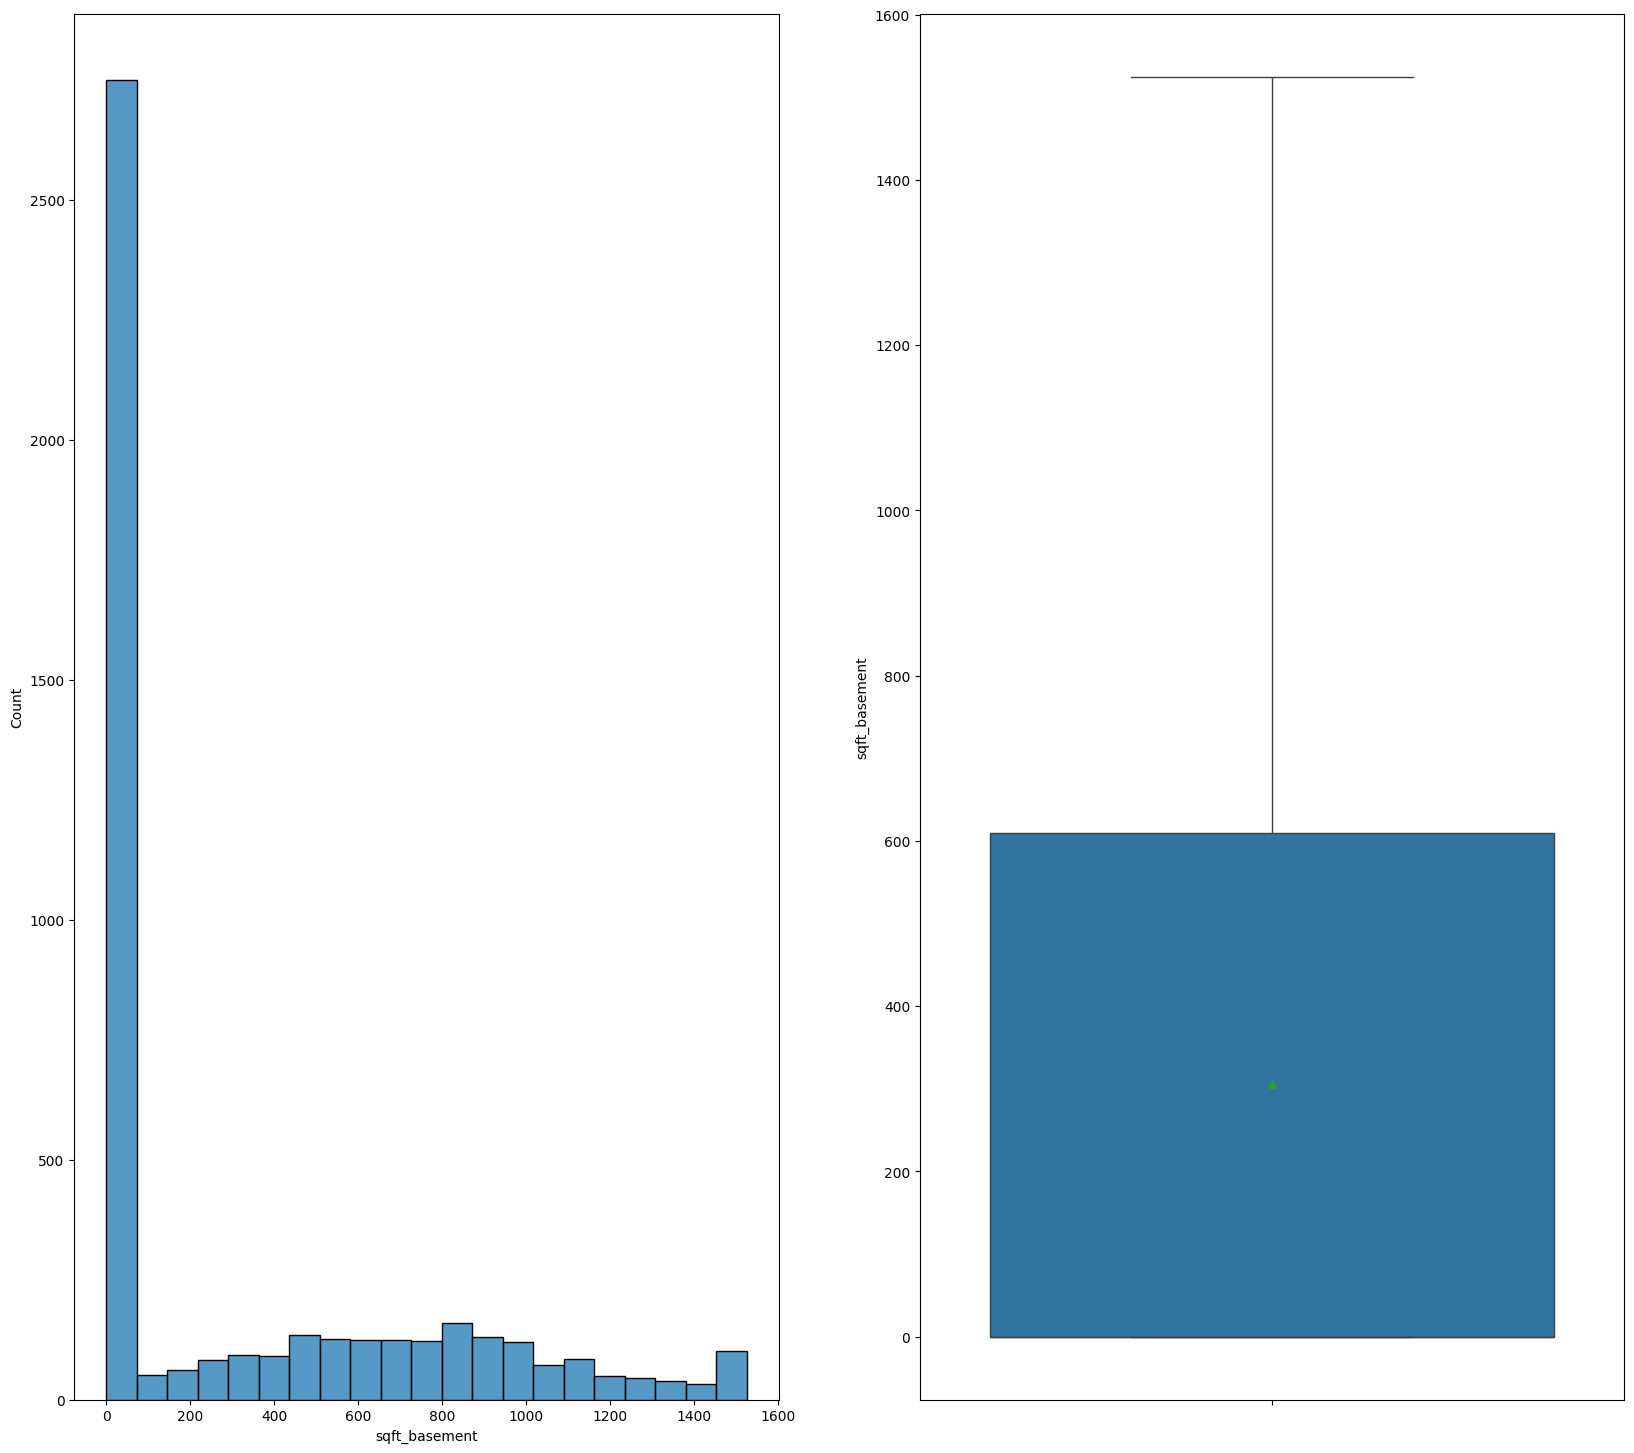

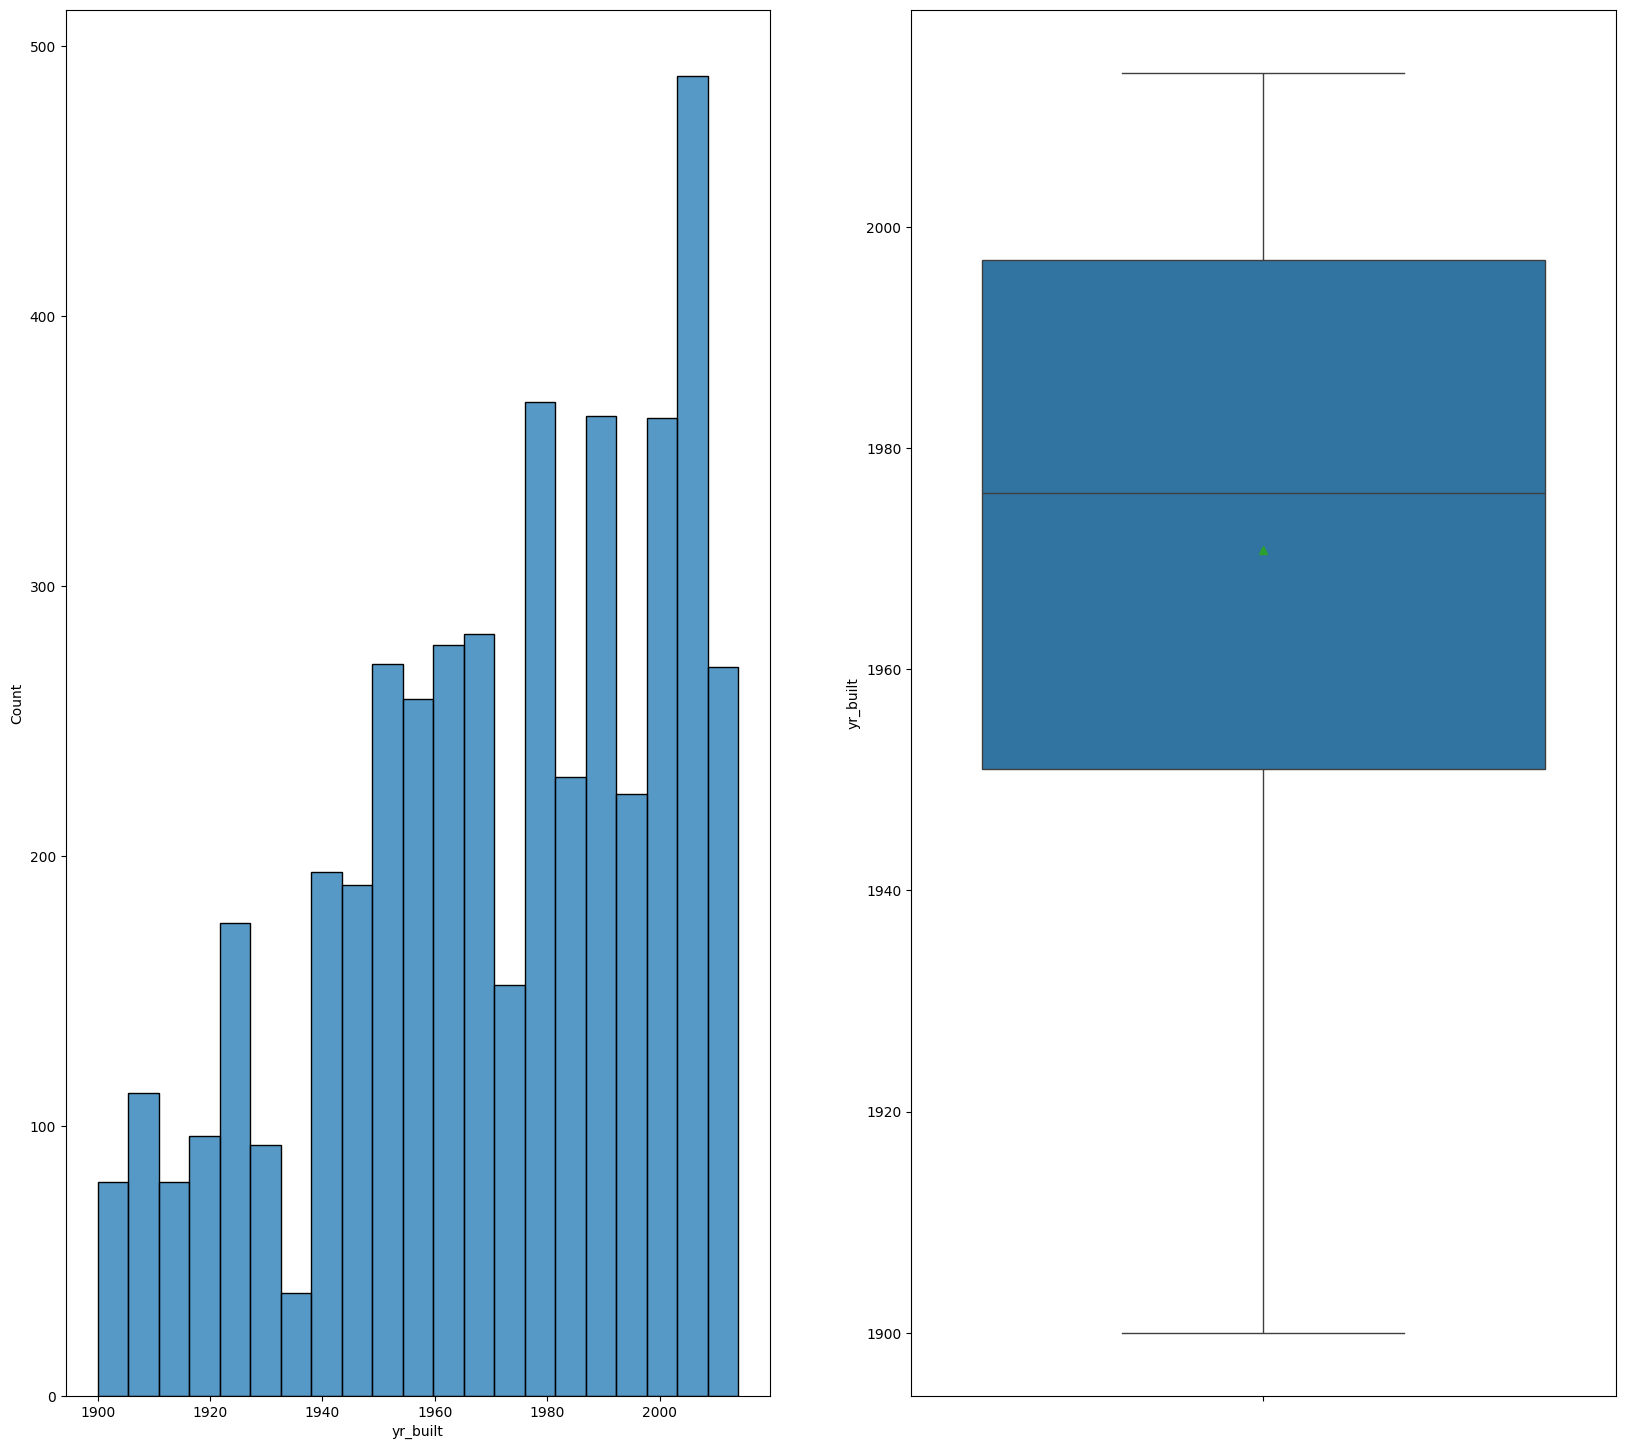

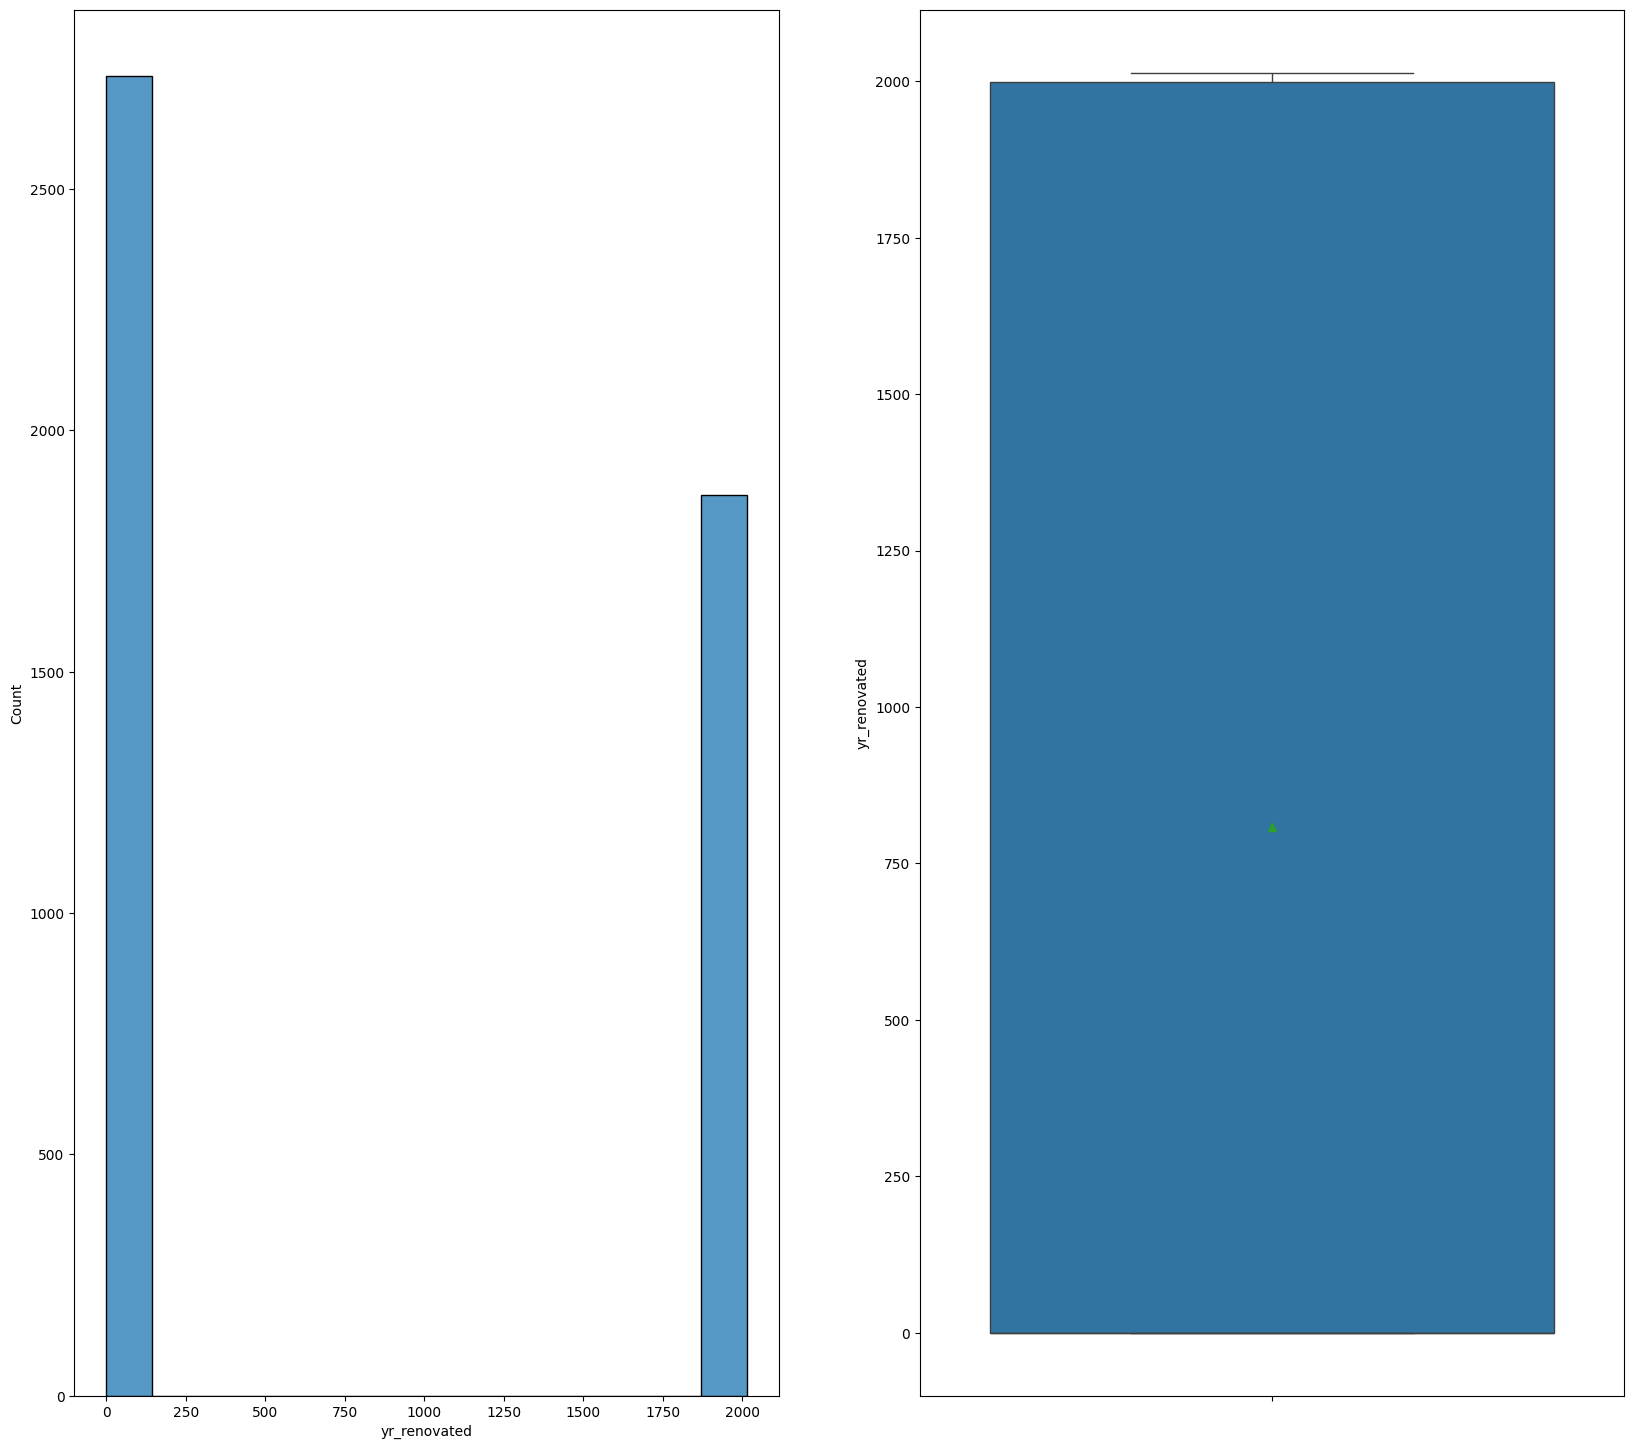

In [26]:
for col in df.select_dtypes('number').columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 18))
    sns.histplot(df[col], ax = axes[0])
    sns.boxplot(df[col], ax = axes[1], showmeans=True)
plt.show() 

In [ ]:
class DataPreprocessor:
    """
    Prétraitement des Données

    • Nettoyage : Imputer les valeurs manquantes.
    • Encodage des variables catégorielles : Appliquer l’encodage par variables factices (dummy variables)
      pour les données non numériques.
    • Standardisation : Standardiser les données numériques pour améliorer les performances des algorithmes.
    • Livrable : Code et documentation du pipeline de prétraitement des données.
    Attributes:
    -----------
    df : pd.DataFrame
        Le DataFrame contenant les données à traiter.
    target_column : str
        La colonne cible pour le modèle.
    exclude_columns : list
        Les colonnes à exclure du prétraitement (par défaut, aucune colonne n'est exclue).
    test_size : float
        La proportion de l'ensemble de test (par défaut, 0.2).
    random_state : int
        Graine aléatoire pour la reproductibilité du découpage en train/test (par défaut, 0).
    """
    
    def __init__(self, df, target_column, exclude_columns=None, test_size=0.2, random_state=0):
        
        self.df = df
        self.target_column = target_column
        self.exclude_columns = exclude_columns if exclude_columns is not None else []
        self.test_size = test_size
        self.random_state = random_state
        


    def split_data(self):
        """
        Divise les données en ensembles d'entraînement et de test.

        Returns:
        --------
        X_train, X_test, y_train, y_test : tuple
            Données divisées en ensembles d'entraînement et de test.
        """
        y = self.df[self.target_column]
        X = self.df.drop([self.target_column] + self.exclude_columns, axis='columns')
        
        X_train, X_test, y_train, y_test = train_test_split(
                                 X, 
                                 y, 
                                 test_size=self.test_size, 
                                 random_state=self.random_state
                            )
        return X_train, X_test, y_train, y_test
        

    def create_pipeline(self, X_train):
        """
        Crée un pipeline de prétraitement pour les données.

        Étapes du pipeline :
        - Imputation des valeurs manquantes.
        - Standardisation des colonnes numériques.
        - Encodage des variables catégorielles avec des variables factices.

        Parameters:
        -----------
        X_train : pd.DataFrame
            Données d'entraînement pour déterminer les types de colonnes.

        Returns:
        --------
        full_pipeline : ColumnTransformer
            Pipeline de transformations pour le prétraitement complet des données.
        """
        num_cols = X_train.select_dtypes(include=['number']).columns
        cat_cols = X_train.select_dtypes(include='object').columns
        num_pipeline = make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler(),
                )
        cat_pipeline = make_pipeline(
                    SimpleImputer(strategy='most_frequent'),
                    OneHotEncoder(handle_unknown='ignore', drop='first')
                )
        full_pipeline = make_column_transformer(
                (num_pipeline, num_cols),
                (cat_pipeline, cat_cols)
            )
        return full_pipeline

In [59]:
preprocessing = DataPreprocessor(df, 'satisfaction',random_state=10)
X_train, X_test, y_train, y_test = preprocessing.split_data()
pipeline = preprocessing.create_pipeline(X_train)

In [60]:
X_train_transform = pipeline.fit_transform(X_train)
X_test_transform = pipeline.transform(X_test)

### 3. Réduction de Dimensionnalité avec l’ACP

### - Appliquer l’ACP pour réduire les dimensions du dataset à 2 ou 3 dimensions

In [61]:
pca = PCA(n_components = 3)
X_train_reduce = pca.fit_transform(X_train_transform)
X_test_reduce = pca.transform(X_test_transform)

### - Visualisation 2D les données projetées pour explorer les groupes et les clusters éventuels

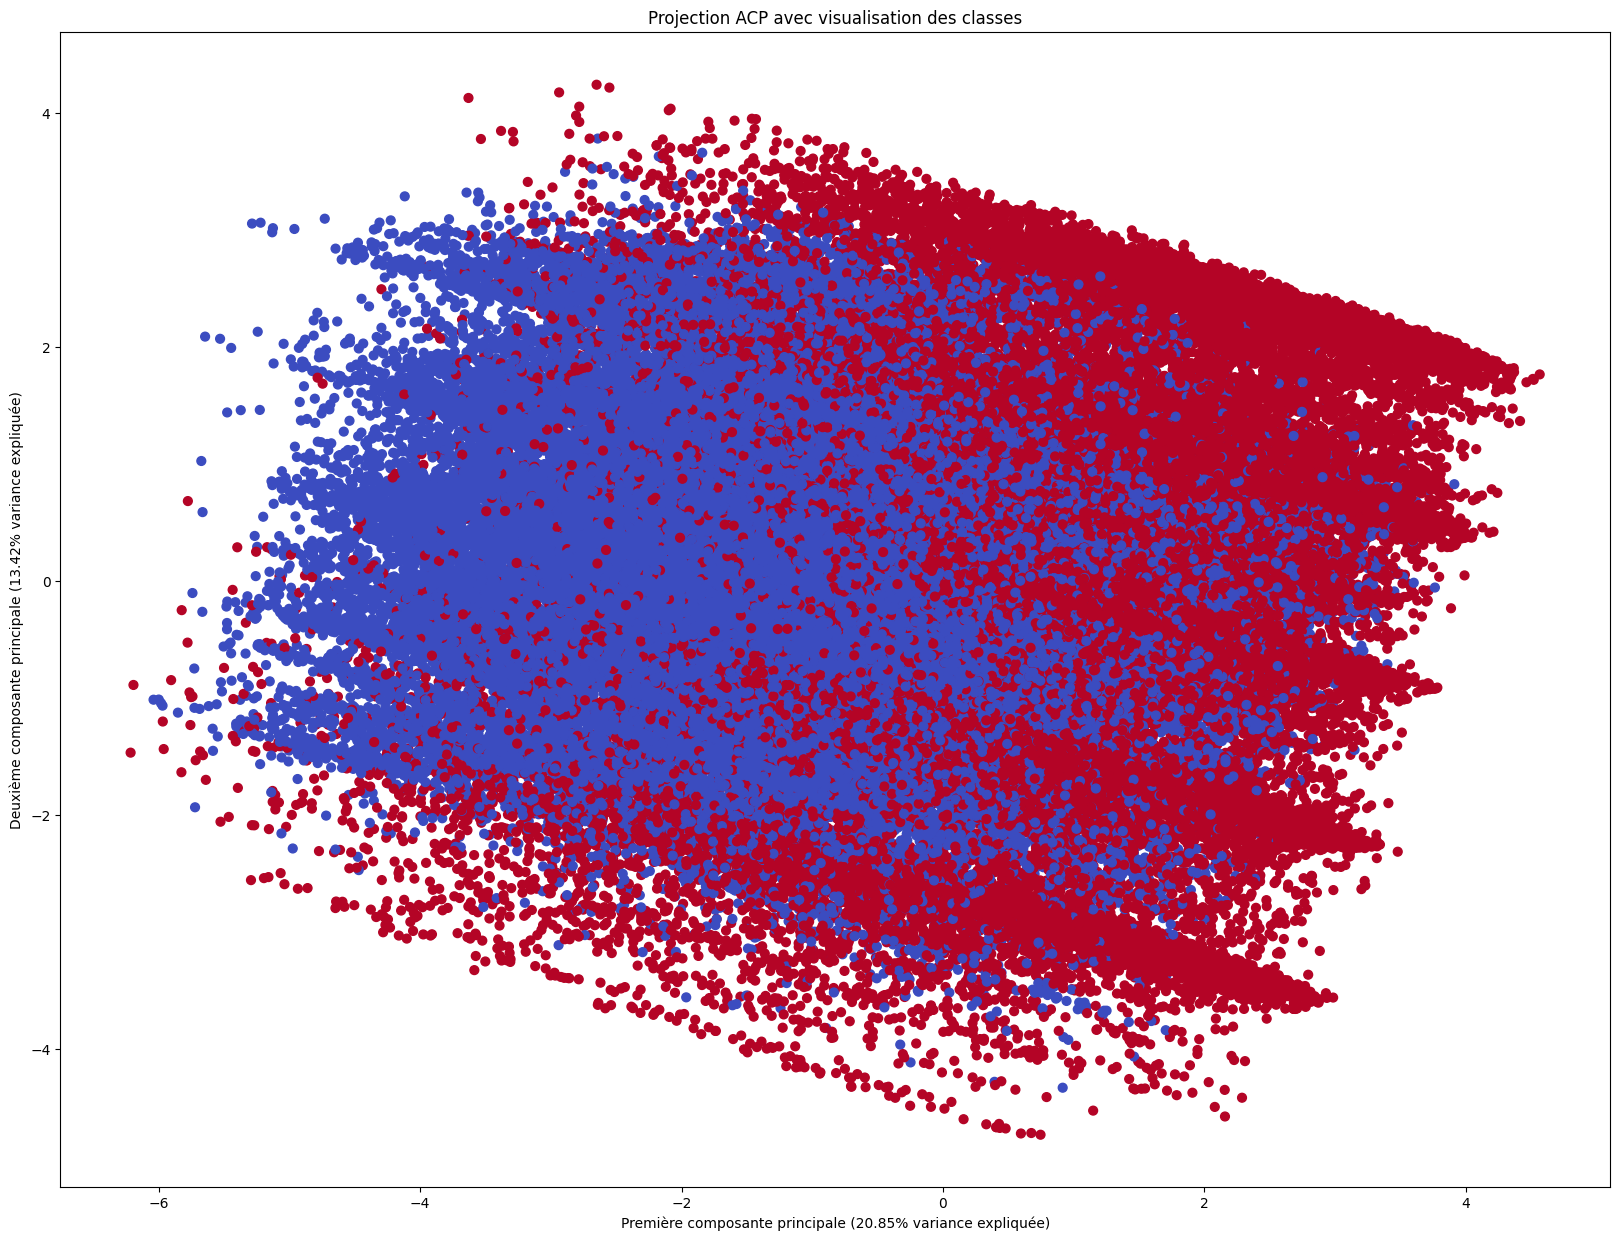

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


plt.figure(figsize=(20, 15))
scatter = plt.scatter(X_train_reduce[:, 0], X_train_reduce[:, 1], 
                     c=y_train_encoded,
                      cmap='coolwarm',
                     s=40)

plt.xlabel(f'Première composante principale ({pca.explained_variance_ratio_[0]:.2%} variance expliquée)')
plt.ylabel(f'Deuxième composante principale ({pca.explained_variance_ratio_[1]:.2%} variance expliquée)')
plt.title('Projection ACP avec visualisation des classes')
plt.show()

En effectuant une visualisation 2D sur les deux premieres composantes de l'ACP, nous remarquons deja deux groupes de clients que nous supposerons satisfait et non satisfait.

### Visualisation 3D

In [63]:
df_pca = pd.DataFrame(X_train_reduce, columns=['PC1', 'PC2', 'PC3'])
df_pca['satisfaction'] = y_train 

def plot_3d_individuals(df_pca, pca):
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(111, projection='3d')
    
    le = LabelEncoder()
    satisfaction_encoded = le.fit_transform(df_pca['satisfaction'])
    

    scatter = ax.scatter(df_pca['PC1'], 
                         df_pca['PC2'], 
                         df_pca['PC3'],
                         c=satisfaction_encoded,
                         cmap='coolwarm',
                         s=80, 
                         alpha=0.6)

    
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
    ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)")
    
    ax.set_title('Visualisation 3D des composantes principales')

    plt.show()
    

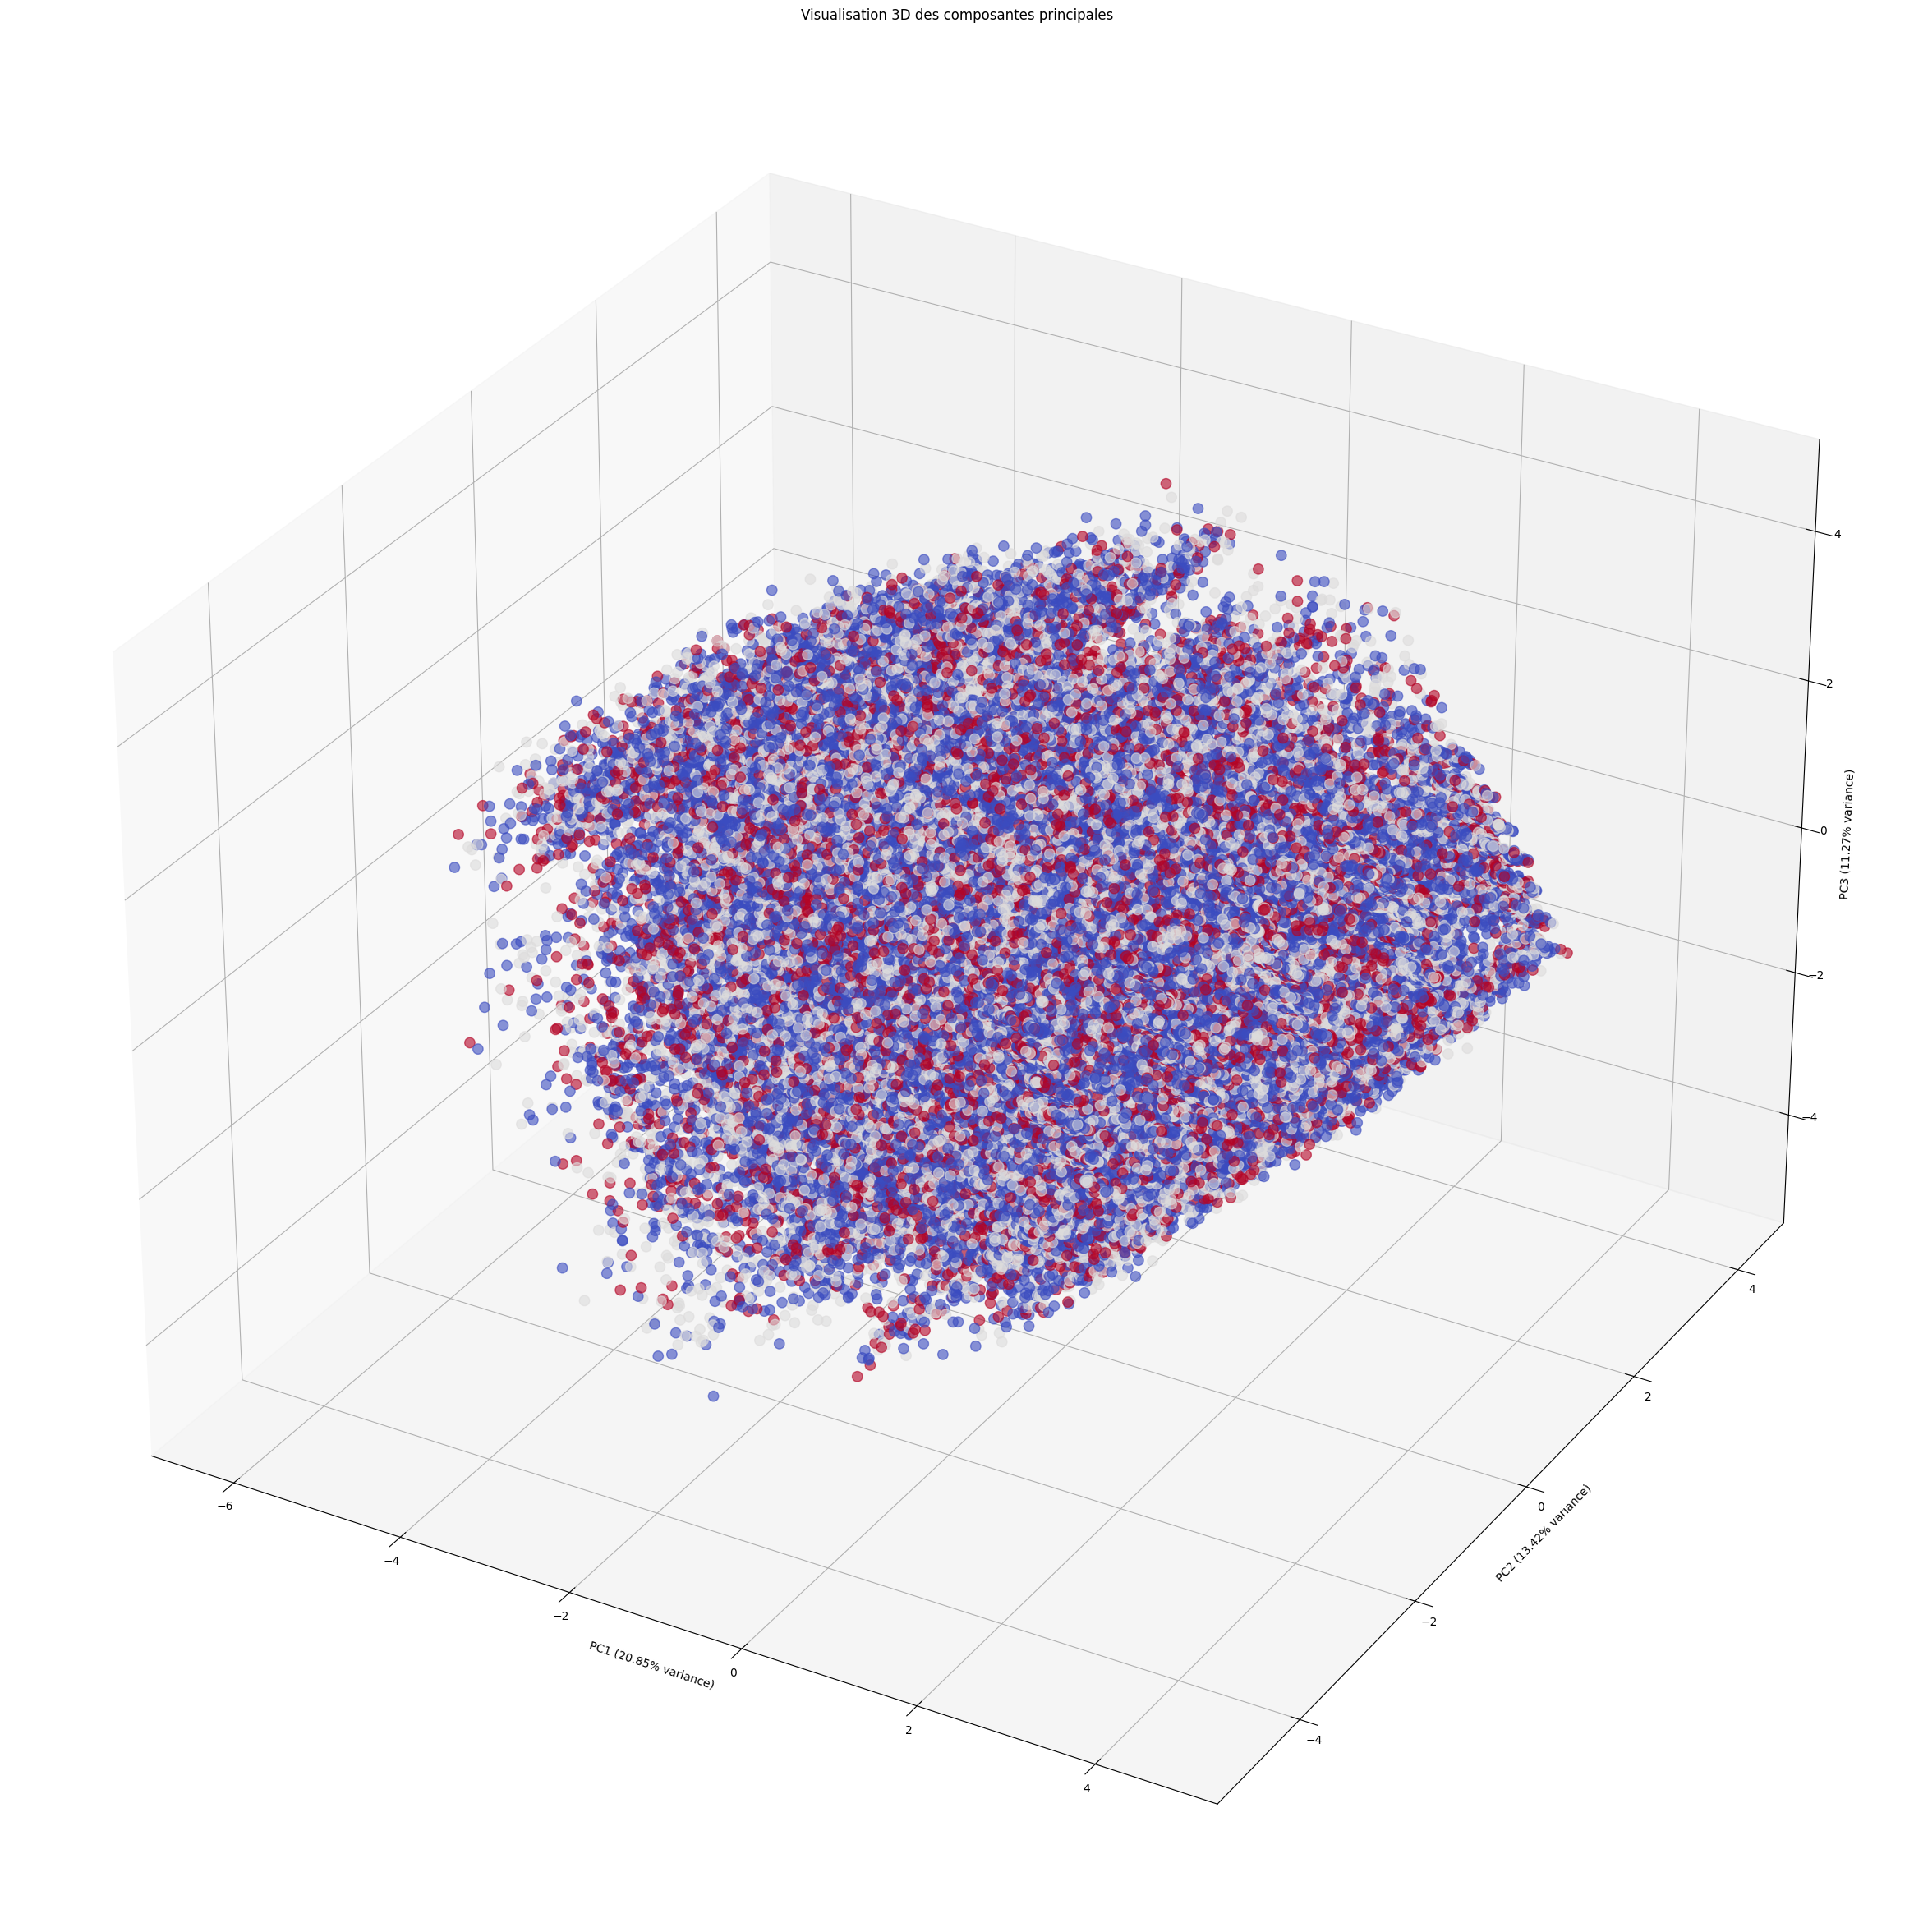

In [64]:
plot_3d_individuals(df_pca, pca)

### 4. Modélisation et Prédiction

### - Appliquer KNN pour classer la satisfaction (satisfait/non-satisfait)

In [65]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_reduce, y_train)
y_pred_knn = model_knn.predict(X_test_reduce)
rapport_KNN = classification_report(y_test, y_pred_knn)
print(rapport_KNN)

              precision    recall  f1-score   support

dissatisfied       0.82      0.82      0.82     11864
   satisfied       0.85      0.84      0.85     14112

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



### - Appliquer Naïve Baye

In [66]:
model_NB = GaussianNB()
model_NB.fit(X_train_reduce, y_train)
y_pred_NB = model_NB.predict(X_test_reduce)
rapport_NB = classification_report(y_test, y_pred_NB)
print(rapport_NB)

              precision    recall  f1-score   support

dissatisfied       0.78      0.70      0.74     11864
   satisfied       0.77      0.84      0.80     14112

    accuracy                           0.77     25976
   macro avg       0.77      0.77      0.77     25976
weighted avg       0.77      0.77      0.77     25976



###  5. Évaluation et Optimisation des Modèles

## Affichons les parametres pour les modeles pour rechercher les hyperparametres pour optimiser les models

In [67]:
print(model_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [68]:
print(model_NB.get_params())

{'priors': None, 'var_smoothing': 1e-09}


### -Utiliser le cross validation pour évaluer les modèles et éviter le surapprentissage.

In [72]:
scores_knn = cross_val_score(model_knn, X_train_reduce, y_train, cv=5, scoring='accuracy')
print(f"Scores de validation croisée: {scores_knn}")
print(f"Précision moyenne: {scores_knn.mean():.2f}")

Scores de validation croisée: [0.82681295 0.82700544 0.83071075 0.83051826 0.82959577]
Précision moyenne: 0.83


In [73]:
scores_nb = cross_val_score(model_NB, X_train_reduce, y_train, cv=5, scoring='accuracy')
print(f"Scores de validation croisée: {scores_nb}")
print(f"Précision moyenne: {scores_nb.mean():.2f}")

Scores de validation croisée: [0.76252346 0.77662288 0.76574756 0.76954911 0.77285852]
Précision moyenne: 0.77


### -Utiliser le GridSearch cv pour optimiser les hyper parametres du KNN.

In [74]:
param_grid = {'n_neighbors': range(1, 20), 'metric': ['minkowski','euclidean', 'manhattan'], 'weights': ['uniform','distance']}

grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_reduce, y_train)

print("Meilleurs hyper-paramètres:", grid_search.best_params_)
print(f"Meilleure performance: {grid_search.best_score_:.3f}")

C:\Users\ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs hyper-paramètres: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Meilleure performance: 0.838


## Modelisons un nouveau KNN avec les nouveaux hyper parametres

In [82]:
model_knn_opt = KNeighborsClassifier(n_neighbors=18, metric='manhattan', weights='distance')
model_knn_opt.fit(X_train_reduce, y_train)
y_pred_knn_opt = model_knn_opt.predict(X_test_reduce)
rapport_KNN_opt = classification_report(y_test, y_pred_knn_opt)
print(rapport_KNN_opt)

              precision    recall  f1-score   support

dissatisfied       0.83      0.83      0.83     11864
   satisfied       0.86      0.85      0.85     14112

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



## Tableau recapitulatif des performances entre le modele Knn et sa version Optimisee

In [91]:
rapport_KNN = classification_report(y_test, y_pred_knn, output_dict=True)
rapport_KNN_opt = classification_report(y_test, y_pred_knn_opt, output_dict=True)

performance_summary = pd.DataFrame({
    'Modèle': ['KNN', 'KNN Optimisé'],
    'Précision': [rapport_KNN['accuracy'], rapport_KNN_opt['accuracy']],
    'Précision (macro)': [rapport_KNN['macro avg']['precision'], rapport_KNN_opt['macro avg']['precision']],
    'Rappel (macro)': [rapport_KNN['macro avg']['recall'], rapport_KNN_opt['macro avg']['recall']],
    'F1-score (macro)': [rapport_KNN['macro avg']['f1-score'], rapport_KNN_opt['macro avg']['f1-score']]
})
print(performance_summary)

         Modèle  Précision  Précision (macro)  Rappel (macro)  \
0           KNN   0.832153           0.830863        0.830960   
1  KNN Optimisé   0.842739           0.841474        0.841798   

   F1-score (macro)  
0          0.830911  
1          0.841629  


Nous remarquons ainsi une legere amelioration entre le modele du KNN avant l'optmisation et apres l'optimisation.
Bien que cela ne fasse pas une tres grande difference a premiere vue d'oeil, il pourrait y avoir encore d'autres hyper-parametres a ajouter et a preciser avec plus analyse.